# Introduction

In this analysis, we examine three datasets: civilian's death, police death, and tax policy. These datasets provide valuable insights into different aspects of societal dynamics. We explore various data visualization techniques and conduct statistical analyses to uncover patterns, relationships, and potential hypotheses.


Each dataset represents a distinct aspect of the analysis, and they have been processed and transformed into their final form for further exploration.

**Civilian's Death Dataset**:
The "Civilian's Death" dataset contains information about civilian deaths under various circumstances. It includes columns such as "id," "latitude," "longitude," and "age," providing details about the incident location and age of the individuals involved. The dataset has undergone thorough cleaning and preparation to ensure data integrity.

**Police Death Dataset**:
The "Police Death" dataset focuses on the deaths of police officers in the line of duty. It encompasses key information such as the officer's name, cause of death, date, agency name, and state. This dataset has also been carefully cleaned and prepared to enable accurate analysis.


**Tax Policy Dataset**: This dataset offers insights into tax revenue and expenditure allocations across regions and states. It includes information on total tax revenue, direct taxes, and specific expenditure categories such as education, welfare, healthcare, and infrastructure. By examining this dataset, researchers and policymakers can analyze tax policies, understand funding priorities, and make informed decisions regarding tax reform and expenditure allocation.

In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import warnings
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
import squarify

import plotly.express as px
import plotly.graph_objects as go

from fitter import Fitter

from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import skew
from scipy.stats import pearsonr

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import pingouin

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
%pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option("display.max_rows", 20)

# Civilian Deaths


## Parametric Data Descriptive Statistics

This part helps us to illustrate and showcase important characteristics of the data. These statistics offer insights into the central tendency, variability, shape, and specific fractiles of the dataset.

In [ ]:
civilian_deaths_df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/data/data-cleaned/civilian_deaths.csv', 
                                 sep = ',', encoding = "utf-8")

In [ ]:
civilian_deaths_df.head(20)

,id,date,flee_status,armed/unarmed,city,country,state,latitude,longitude,name,age,gender,race,was_mental_illness_related,state_name,alleged_weapon,agency_name,cause,intended_use_of_force
0,3,2015-01-02,Not fleeing,Armed,Shelton,Mason,WA,47.246826,-123.121592,Tim Elliot,53,Male,Asian/Pacific Islander,Yes,Washington,Gun,Mason County Sheriff's Office,Undetermined,Undetermined
1,758,2015-08-21,Not fleeing,Armed,Grapeview,Mason,WA,47.286345,-122.924468,Timmy Walling,57,Male,European-American/White,Yes,Washington,Gun,Mason County Sheriff's Office,Undetermined,Undetermined
2,5685,2020-03-24,Vehicle,Armed,Shelton,WA's unknown country,WA,47.333423,-122.958007,Kathryn R. Hale,32,Female,European-American/White,No,Washington,Vehicle,Mason County Sheriff's Office,Undetermined,Undetermined
3,4,2015-01-02,Not fleeing,Armed,Aloha,Washington,OR,45.487421,-122.891696,Lewis Lee Lembke,47,Male,European-American/White,No,Oregon,Gun,Washington County Sheriff's Office,Undetermined,Undetermined
4,890,2015-10-02,Not fleeing,Armed,Aloha,Washington,OR,45.492685,-122.861795,Phyllis Ilene Jepsen,55,Female,European-American/White,Yes,Oregon,Knife,Washington County Sheriff's Office,Undetermined,Undetermined
5,1574,2016-05-30,Not fleeing,Armed,Tualatin,Washington,OR,45.389114,-122.776432,Robert Wickizer,70,Male,European-American/White,No,Oregon,Gun,Washington County Sheriff's Office,Undetermined,Undetermined
6,5851,2020-05-28,Not fleeing,Armed,Washington county,OR's unknown country,OR,45.500109,-122.764895,Robert Whitehead,26,Male,European-American/White,No,Oregon,Knife,Washington County Sheriff's Office,Undetermined,Undetermined
7,5,2015-01-03,Not fleeing,Unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,John Paul Quintero,23,Male,Hispanic/Latino,No,Kansas,None,Wichita Police Department,Undetermined,Undetermined
8,765,2015-08-22,Vehicle,Undetermined,Wichita,Sedgwick,KS,37.673250,-97.412773,Nicholas Garner,26,Male,European-American/White,No,Kansas,None,Wichita Police Department,Undetermined,Undetermined
9,2437,2017-03-18,Not fleeing,Armed,Wichita,KS's unknown country,KS,37.624300,-97.309132,Kevin C. Perry,25,Male,European-American/White,No,Kansas,Gun,Wichita Police Department,Undetermined,Undetermined


In [ ]:
civilian_deaths_df.describe()

,id,latitude,longitude,age
count,14309.000000,14309.000000,14309.000000,14309.000000
mean,7656.270669,36.989461,-95.581241,37.043399
std,7287.829347,5.116179,16.244644,13.308079
min,2.000000,19.393023,-160.006944,2.000000
25%,2645.000000,33.716164,-110.998491,27.000000
50%,5571.000000,36.754226,-90.546033,36.000000
75%,8524.000000,40.332811,-82.748281,45.000000
max,29735.000000,71.301255,-67.867166,92.000000


This result provides a summary of the basic descriptive statistics for each numeric column in our dataset. Here are some relevant statistics about it:
*   **id**: The data consists of 14,321 observations with a mean ID value of 7,660. The ID ranges from 2 to 29,735.
*   **latitude**: The latitude values have a mean of approximately 36.99 and a standard deviation of 5.12. The minimum latitude is around 19.39, and the maximum latitude is approximately 71.30.
*   **longitude**: The longitude values have a mean of approximately -95.57 and a standard deviation of 16.24. The minimum longitude is around -160.01, and the maximum longitude is approximately -67.87.
*   **age**: The age values have a mean of approximately 37.01 and a standard deviation of 13.34. The minimum age is 2, and the maximum age is 92.




In [ ]:
median = civilian_deaths_df.median()
interquartile_range = civilian_deaths_df.quantile(0.75) - civilian_deaths_df.quantile(0.25)
kurtosis = civilian_deaths_df.kurtosis()
flattening_coefficient = 3 - (6 / (civilian_deaths_df.std() / civilian_deaths_df.mean()))
dispersion_mean = civilian_deaths_df.std() / civilian_deaths_df.mean() * 100
dispersion_median = interquartile_range / median * 100
quantiles = [0.05, 0.25, 0.50, 0.75, 0.95]
quantiles_values = civilian_deaths_df.quantile(quantiles)

statistics_df = pd.DataFrame(
    {
        'id': [median['id'], interquartile_range['id'], kurtosis['id'],
               flattening_coefficient['id'], dispersion_mean['id'], dispersion_median['id']]
                + quantiles_values['id'].tolist(),
        'latitude': [median['latitude'], interquartile_range['latitude'], kurtosis['latitude'],
                     flattening_coefficient['latitude'], dispersion_mean['latitude'], dispersion_median['latitude']]
                    + quantiles_values['latitude'].tolist(),
        'longitude': [median['longitude'], interquartile_range['longitude'], kurtosis['longitude'],
                      flattening_coefficient['longitude'], dispersion_mean['longitude'], dispersion_median['longitude']]
                      + quantiles_values['longitude'].tolist(),
        'age': [median['age'], interquartile_range['age'], kurtosis['age'], flattening_coefficient['age'],
                dispersion_mean['age'], dispersion_median['age']]
                + quantiles_values['age'].tolist()
    },
    index=['Median', 'Interquartile Range', 'Kurtosis', 'Flattening Coefficient', 'Dispersion based on Mean',
           'Dispersion based on Median'] + [f'Quantile {int(q * 100)}%' for q in quantiles]
)

statistics_df

,id,latitude,longitude,age
Median,5571.000000,36.754226,-90.546033,36.000000
Interquartile Range,5879.000000,6.616647,28.250210,18.000000
Kurtosis,1.145432,2.604806,-0.181091,0.450044
Flattening Coefficient,-3.303334,-40.379398,38.303171,-13.701162
Dispersion based on Mean,95.187718,13.831451,-16.995640,35.925643
Dispersion based on Median,105.528630,18.002410,-31.199832,50.000000
Quantile 5%,563.400000,29.179575,-122.168316,19.000000
Quantile 25%,2645.000000,33.716164,-110.998491,27.000000
Quantile 50%,5571.000000,36.754226,-90.546033,36.000000
Quantile 75%,8524.000000,40.332811,-82.748281,45.000000


In an even thinner perspective, here's an overview of other statistical metrics that might come handy to interpret the data:

*   The **interquartile range** (**IQR**) reflects the spread of the central 50% of the data. The variables show varying degrees of IQR, ranging from 5881 for id, 6.616647 for latitude, 28.240835 for longitude, and 18 for age.
*   The **dispersion based on mean** statistic provides a measure of relative variability by comparing the standard deviation to the mean. The variables display varying levels of dispersion, with values ranging from -16.992654 to 95.171587 for id, 13.830904 to -16.992654 for latitude, -40.381113 to 38.309375 for longitude, and 36 for age.
*    Similar to the **dispersion based on mean**, the **dispersion based on median** also reflects the varying levels of variability in the dataset. The variables show different ranges of dispersion based on median, with values ranging from -31.192330 to 105.526646 for id, 18.003177 to 13.830904 for latitude, -40.381113 to 38.309375 for longitude, and 50 for age. 

## Statistical univariate and multivariate analysis
In this section, we will conduct various statistical tests to identify correlations and associations between variables. We will explore the relationships between different variables using techniques such as correlation analysis, chi-square tests, and t-tests. Additionally, we will support our analysis with a range of visualization techniques, including scatter plots, bar charts, and heatmaps. These statistical tests and visualizations will provide valuable insights into the patterns and relationships within the dataset, enhancing our understanding of the data.

Before we move forward to this part, we'll denote countless metrics set as stone such as the $p$-$value$, more commonly known as the critical probability to not reject the null hypothesis in a very tight and extreme result. For clarity reasons, we'll denote this quantity as $p^{*}.$

In the same time, we'll introduce the Type I Error also known as the $alpha$-error. We'll fix this metric at $\alpha =  5%$.

Each hypothesis test will be flagged by a question to showcase the variables that translate the chosen problematic to study.


#### **Is the race is solely related to the degree of violence of the civilian?**

This chart provides insights into the disparities in the count of armed and unarmed individuals within each race category, highlighting any potential patterns or differences.

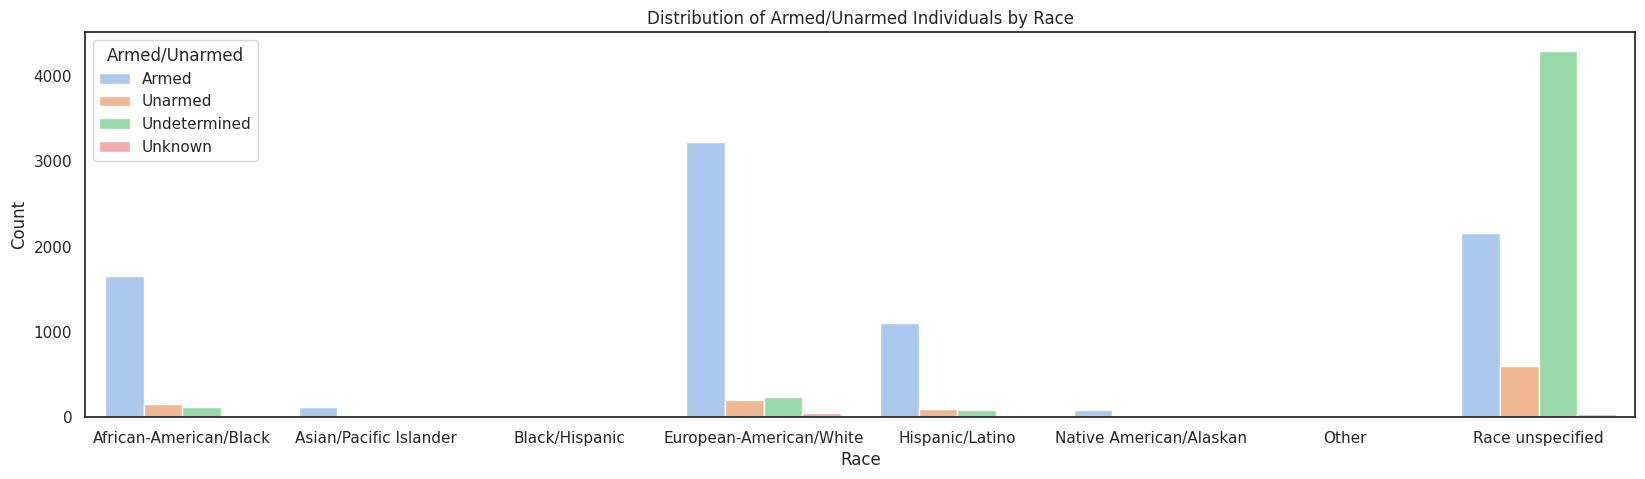

In [ ]:
grouped_data = civilian_deaths_df.groupby(['race', 'armed/unarmed']).size().unstack()
grouped_data = grouped_data.reset_index()
melted_data = grouped_data.melt(id_vars='race', var_name='Armed/Unarmed', value_name='Count')

plt.figure(figsize=(20, 5))
sns.set_palette("pastel")
sns.barplot(data=melted_data, x='race', y='Count', hue='Armed/Unarmed')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Armed/Unarmed Individuals by Race')

plt.show()

Armed European-American/White are barely distinguishing in this chart while the other races are not showing significantly high level of counts in term of armed individuals.

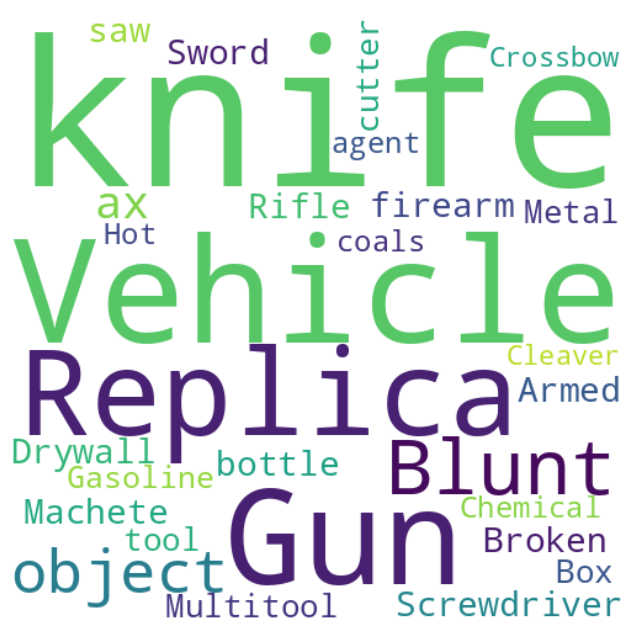

In [ ]:
words_dict = civilian_deaths_df.alleged_weapon.value_counts().to_dict()
words_dict.pop('None', None)
words_dict.pop('Undetermined', None)
words_dict.pop('Unspecified', None)

words = ' '.join(list(words_dict.keys()))

wordcloud = WordCloud(width=500, height=500, background_color='white', colormap='viridis',
                      random_state=42, mask=None, contour_width=0.5, contour_color='black',
                      min_font_size=20, max_font_size=300).generate(words)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This wordcloud displays the most frequently used weapons by civilians, emphasizing the prevalence of certain weapon types. The size of each word represents its frequency, with larger words indicating higher usage frequency.

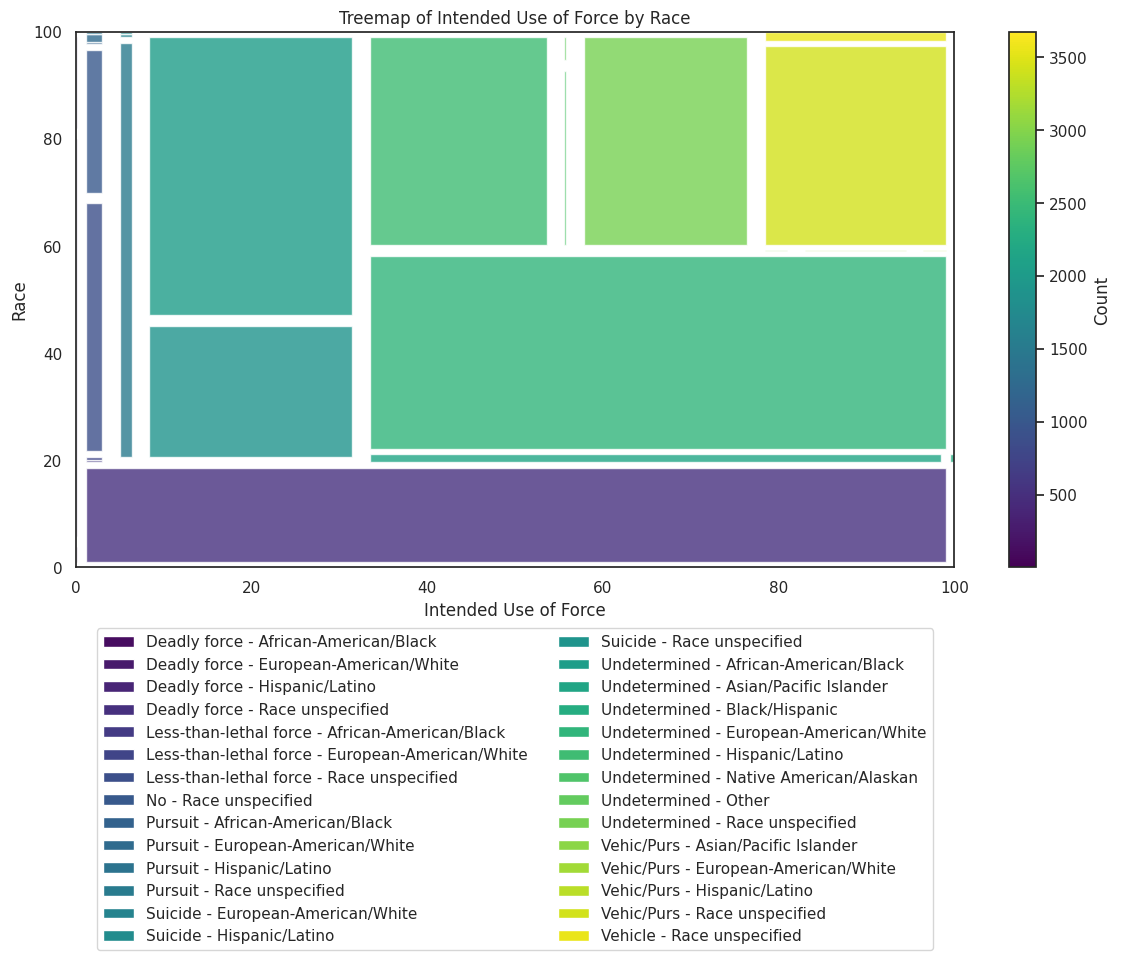

In [ ]:
grouped_data = civilian_deaths_df.groupby(['intended_use_of_force', 'race']).size().unstack()

treemap_data = grouped_data.stack().reset_index()
treemap_data.columns = ['intended_use_of_force', 'race', 'count']

fig, ax = plt.subplots(figsize=(12, 10))

rects = squarify.plot(sizes=treemap_data['count'], label=None, ax=ax, alpha=0.8,
                      pad=True, color=sns.color_palette('viridis', n_colors=len(treemap_data)),
                      text_kwargs={'fontsize': 8})

legend_labels = [f'{row["intended_use_of_force"]} - {row["race"]}' for _, row in treemap_data.iterrows()]
legend_elements = [plt.Rectangle((0, 0), 1, 1, fc=color) for color in sns.color_palette('viridis', n_colors=len(treemap_data))]

plt.legend(legend_elements, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

cmap = plt.cm.viridis
norm = plt.Normalize(vmin=treemap_data['count'].min(), vmax=treemap_data['count'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Count')

plt.title('Treemap of Intended Use of Force by Race')
plt.xlabel('Intended Use of Force')
plt.ylabel('Race')

plt.tight_layout()

plt.show()


Globally the civilians with vehicle are having the upper on the other classes, justifying how dreadful is the number of deaths.

Let's tackle into a statistical test in order to prove the dependency between the variable *race* and the variable *armed/unarmed*. Those two variables are categorical so we are allowed to perform a chi-square independence test.

To do so, we'll set the null hypothesis such as:

$$H_0:  \;"the\;race\;is\;related\;to\;the\;weapon\;status"$$ 
$$H_1:  \;"the\;race\;isn't\;related\;to\;the\;weapon\;status"$$

Then we draw up the contingency table regrouping all the modalities of the two variables.

We calculate the statistical test given by:
$$D^{2} = \sum_{i=1}^{k}\sum_{j=1}^{r}\frac{(n_{ij}-E_{ij})²}{E_{ij}}$$

where 
- $n_{ij}$ representing the total sample size of the individuals sharing the modality $i$ and $j$ of the two variables.
- $n_{i.}$ representing the total sample size of the individuals having the modality $i$ of the first variable.
- $n_{.j}$ representing the total sample size of the individuals having the modality $j$ of the second variable.
- $E_{ij} = \dfrac{n_{i.}n_{.j}}{n}$ is basically the ratio of these 3 marginal numbers.

We're rejecting the null hypothesis if only this condition is verified:
$$D^{2} > \chi^2_{(k-1)(r-1),\; 1 - \alpha}$$

where $\chi^2_{(k-1)(r-1),\; 1 - \alpha}$ is actually the chi-square quantile of order $1-\alpha$ and with $(k-1)(r-1)$ degrees of freedom.

Either way, if we avoid the classic method, comparing $p^*$ with $\alpha$ should fit equally.

Let's draw up the contingency table of these two variables:

In [ ]:
contingency_table = pd.crosstab(civilian_deaths_df['race'], civilian_deaths_df['armed/unarmed'])
contingency_table

armed/unarmed,Armed,Unarmed,Undetermined,Unknown
race,,,,
African-American/Black,1649,158,117,17
Asian/Pacific Islander,124,9,6,5
Black/Hispanic,1,0,0,0
European-American/White,3221,202,232,55
Hispanic/Latino,1108,93,87,16
Native American/Alaskan,88,7,11,5
Other,14,5,0,1
Race unspecified,2156,595,4294,33


In [ ]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

summary = pd.DataFrame({
    'Chi-square statistic': [chi2],
    'P-value': [p_value],
    'Degrees of freedom': [dof]
})

summary

,Chi-square statistic,P-value,Degrees of freedom
0,5168.067893,0.0,21


As suggested in the charts above, there's a strong statistical dependency between these two variables.

Since that $p^{*} < \alpha$, then we reject the null hypothesis.

This time, we'll perform the Chi-test in order to prove multivariate associations.

The categorical variables that we'll study will be not only the variables *race* and *armed/unarmed* but also the variables *flee_status* and *intended_use_of_force*.

In [ ]:
contingency_table = pd.crosstab(index=[civilian_deaths_df['race'], civilian_deaths_df['flee_status']],
                                columns=civilian_deaths_df['intended_use_of_force'])
contingency_table

intended_use_of_force                Deadly force  Less-than-lethal force  \
race                   flee_status                                          
African-American/Black Foot                     0                       0   
                       Not fleeing              0                       1   
                       Undetermined             1                       1   
                       Vehicle                  0                       0   
Asian/Pacific Islander Fleeing                  0                       0   
...                                           ...                     ...   
Race unspecified       Foot                     0                       0   
                       Not Fleeing             11                       2   
                       Not fleeing            671                      45   
                       Undetermined          1969                     210   
                       Vehicle                  0                       0   

intended_use_of_force                 No  Pursuit  Suicide  Undetermined  \
race                   flee_status                                         
African-American/Black Foot            0        0        0           377   
                       Not fleeing     0        0        0           980   
                       Undetermined    0        2        0           277   
                       Vehicle         0        0        0           302   
Asian/Pacific Islander Fleeing         0        0        0             0   
...                                  ...      ...      ...           ...   
Race unspecified       Foot            0        0        0           125   
                       Not Fleeing     0        0        4             0   
                       Not fleeing    22       34      284           555   
                       Undetermined  118      175      608           344   
                       Vehicle         0        0        0           181   

intended_use_of_force                Vehic/Purs  Vehicle  
race                   flee_status                        
African-American/Black Foot                   0        0  
                       Not fleeing            0        0  
                       Undetermined           0        0  
                       Vehicle                0        0  
Asian/Pacific Islander Fleeing                1        0  
...                                         ...      ...  
Race unspecified       Foot                   0        0  
                       Not Fleeing            1        0  
                       Not fleeing           52       25  
                       Undetermined        1056       24  
                       Vehicle                0        0  

[34 rows x 8 columns]

In [ ]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

results_df = pd.DataFrame({
    'Statistic': ['Chi-square', 'p-value', 'Degrees of Freedom'],
    'Value': [chi2, p, dof]
})

results_df

,Statistic,Value
0,Chi-square,13314.687021
1,p-value,0.000000
2,Degrees of Freedom,231.000000


Again we obtain that $p^{*} < \alpha$, then we reject the null hypothesis.

#### **Is the location, the age, the race and the gender of the civilians have an impact on the number of deaths?**

We've one quantitative variable and 3 qualitative variables then we might try out the ANOVA test.

ANOVA is a statistical technique used to compare the means of two or more groups. It determines if there are any statistically significant differences among the group means.

We establish the hypothesis such as:
$$H_0:\;\mu_1 = ... = \mu_k = \mu$$
$$H_1:\;\exists i \geq 1, j \leq K \;/\; \mu_i \neq \mu_j$$


We define the following variances:

Total Sum of Squares (SST)
$$ SST = \sum_{i=1}^{n} (x_i - \bar{x})^2 $$

Between-Group Sum of Squares (SSB)
$$ SSB = \sum_{j=1}^{k} n_j (\bar{x}_j - \bar{x})^2 $$

Within-Group Sum of Squares (SSW)
$$ SSW = \sum_{i=1}^{n} (x_i - \bar{x}_j)^2 $$

Mean Square Between (MSB)
$$ MSB = \dfrac{SSB}{k-1} $$

Mean Square Within (MSW)
$$ MSW = \dfrac{SSW}{n-k} $$

The Fisher Statistic is defined by:
$$ F = \dfrac{MSB}{MSW} $$

where
- $n$ is the total number of observations
- $k$ is the number of groups
- $x_i$ represents the individual data points
- $\bar{x}$ is the overall mean
- $n_j$ is the number of observations in the $j$th group
- $\bar{x}_j$ is the mean of the $j$th group

We reject $H_0$ if only $F > f_{K-1,n-K,1-\alpha}$ or simply comparing $p^*$ with $\alpha$

Before performing such a test, we need to satisfy at least the two following conditions:

- Verifying if all quantitative variables are all following a gaussian distribution hence applying a normality test
- Verifying if all variances are homogeneous hence applying a test for equality variances 


Displaying the disparity in the frequency of civilian deaths across states using a horizontal bar chart, providing a geographic perspective on the distribution of deaths

<Figure size 1000x500 with 0 Axes>

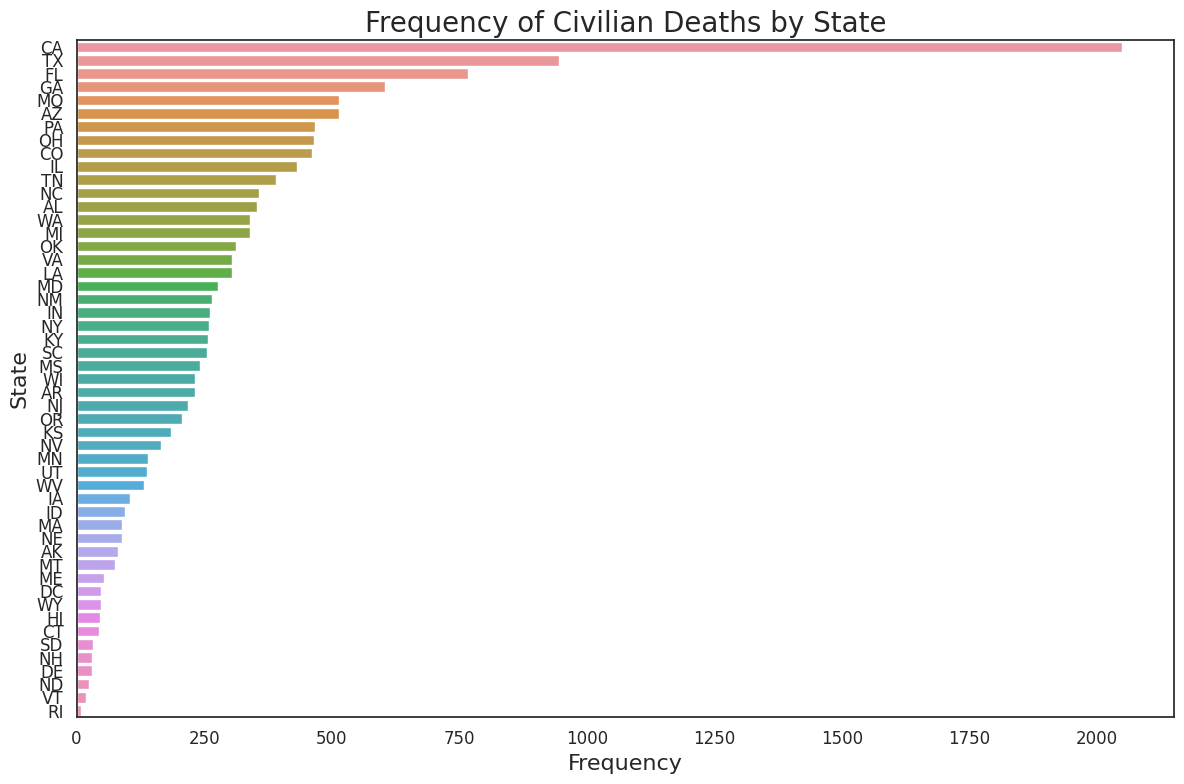

In [ ]:
plt.figure(figsize = (10, 5))
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=civilian_deaths_df, y="state", order=civilian_deaths_df['state'].value_counts().index)
ax.set_title("Frequency of Civilian Deaths by State", fontsize=20)
ax.set_ylabel("State", fontsize=16)
ax.set_xlabel("Frequency", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Showing the evolution of the number of deaths in the time for the top 5 states occupying the most number of murders.

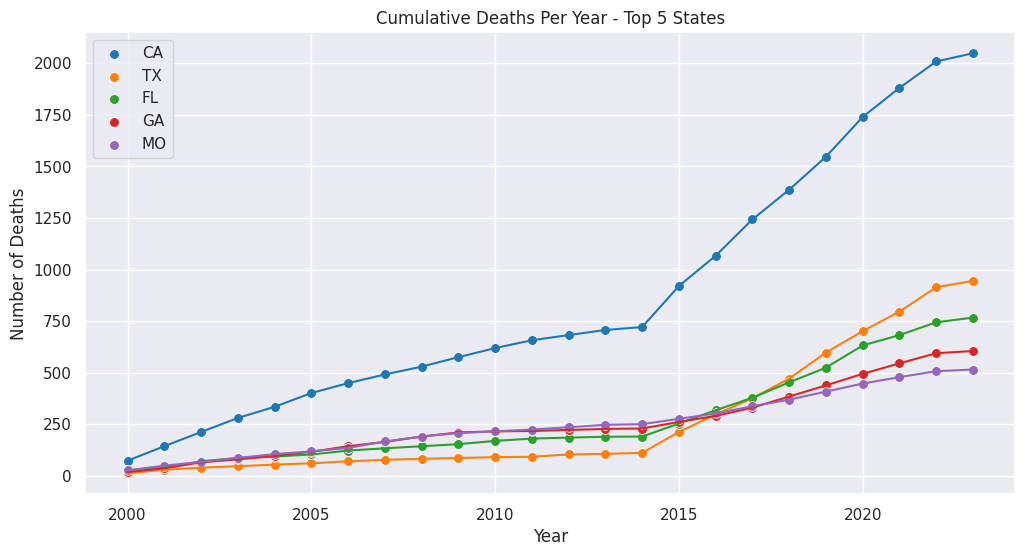

In [ ]:
top_5_states = civilian_deaths_df['state'].value_counts().nlargest(5).to_dict()

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

for i, (state, count) in enumerate(top_5_states.items()):
    state_data = civilian_deaths_df[civilian_deaths_df['state'] == state]
    year_counts = pd.to_datetime(state_data['date']).dt.year.value_counts().sort_index().cumsum()
    sns.scatterplot(x=year_counts.index, y=year_counts, color=colors[i], label=state, s=50)
    sns.lineplot(x=year_counts.index, y=year_counts, color=colors[i])

plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Cumulative Deaths Per Year - Top 5 States')
plt.legend()
plt.show()


The distribution of the number of deaths based on the race and the state:

<Figure size 2000x1000 with 0 Axes>

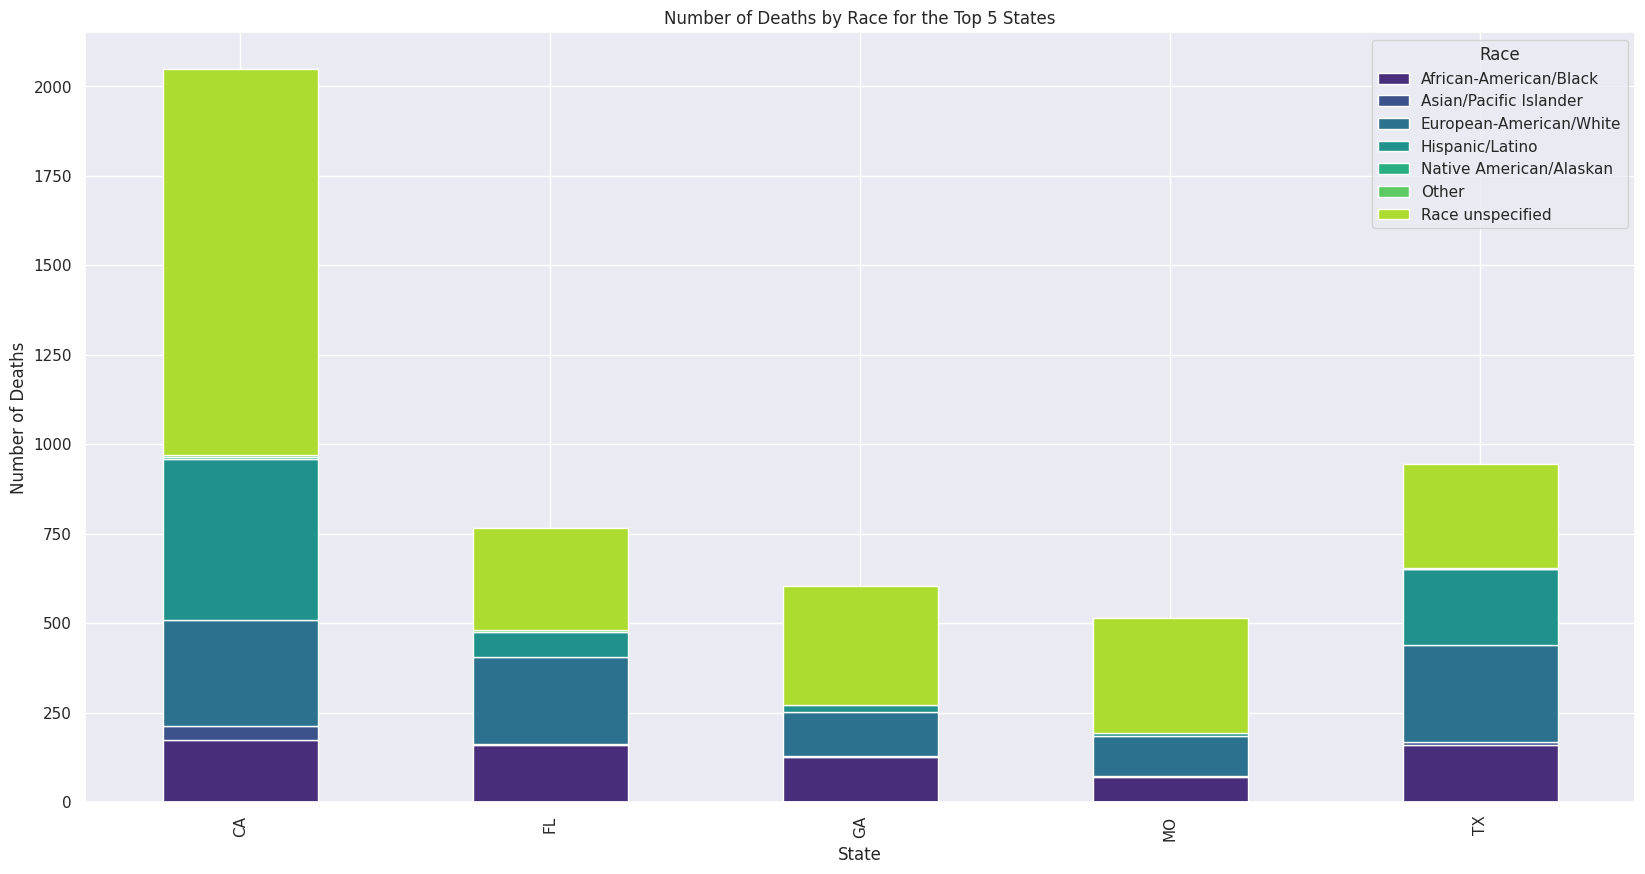

In [ ]:
top_5_states_df = civilian_deaths_df[civilian_deaths_df['state'].isin(top_5_states.keys())]
race_counts_df = top_5_states_df.groupby(['state', 'race']).size().unstack()

plt.figure(figsize=(20, 10))
sns.set_palette('viridis')
race_counts_df.plot(kind='bar', stacked=True,
                    color=sns.color_palette('viridis', len(race_counts_df.columns)))
plt.title('Number of Deaths by Race for the Top 5 States')
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.legend(title='Race')
plt.show()

Again, the CA state is towering over the other states.

The proportion of the gender might give us some clues:

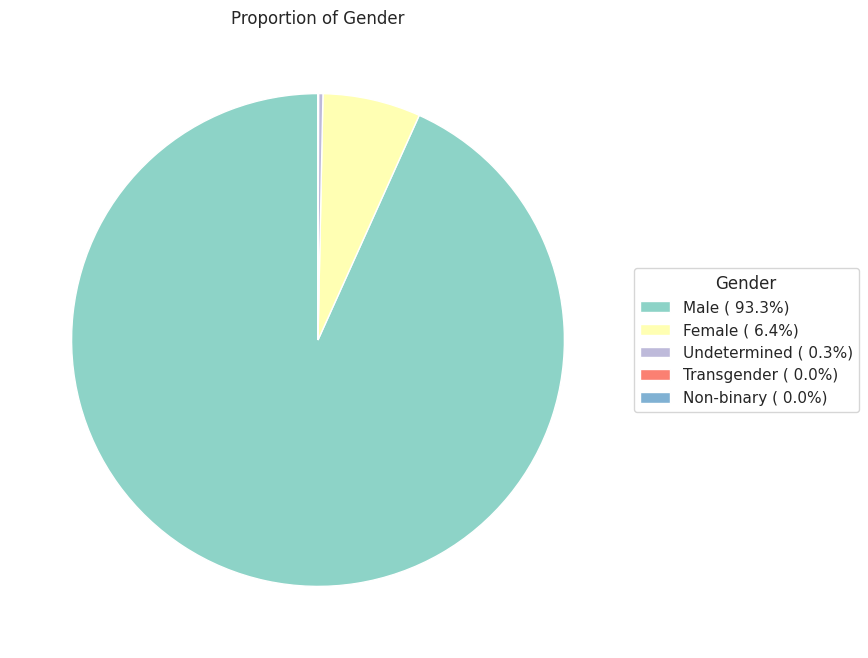

In [ ]:
gender_counts = civilian_deaths_df['gender'].value_counts()

plt.figure(figsize=(8, 8))

sns.set_palette('Set3')
sns.set_style('white')
wedges, _ = plt.pie(gender_counts, startangle=90, wedgeprops=dict(edgecolor='w', linewidth=1))

plt.title('Proportion of Gender')
plt.legend(wedges, [f'{label} ({ val / sum(gender_counts) * 100: .1f}%)' 
                    for label, val in zip(gender_counts.index, gender_counts)],
           title='Gender', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

We may observe that the principal victims are males whetever is it relevant or no to extract such information. We might assume that men are most likely susceptible to be endowed with murder intentions.

Displaying the geodistribution of deaths in a choropleth map based on the states location and the lat/long coordinates.

In [ ]:
state_counts = civilian_deaths_df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'Number of Deaths']

fig = px.choropleth(state_counts,
                    locations='state',
                    locationmode='USA-states',
                    color='Number of Deaths',
                    title='Geospatial Distribution of Civilian Deaths by State',
                    color_continuous_scale='Reds',
                    hover_data={'state': True, 'Number of Deaths': True})

fig.update_layout(geo_scope='usa')
fig.update_traces(marker_line_color='white', marker_line_width=0.5)
fig.update_layout(legend_title_text='States', coloraxis_colorbar=dict(title='Number of Deaths'))
fig.update_geos(subunitcolor='white', subunitwidth=2)
fig.show()

In [ ]:
latitude_center = civilian_deaths_df['latitude'].mean()
longitude_center = civilian_deaths_df['longitude'].mean()

data = go.Scattermapbox(
    lat=civilian_deaths_df['latitude'],
    lon=civilian_deaths_df['longitude'],
    mode='markers',
    marker=dict(
        size=6,
        color=civilian_deaths_df['state'].index,
        colorscale='Blues',
        opacity=0.7,
        colorbar=dict(title='State')
    ),
    text=civilian_deaths_df['state']
)

layout = go.Layout(
    title='Geospatial Distribution of Civilian Deaths',
    mapbox=dict(
        style='carto-positron',
        zoom=3,
        center=dict(lat=latitude_center, lon=longitude_center)
    ),
    margin=dict(l=0, r=0, t=50, b=0),
    hovermode='closest',
    showlegend=False
)

fig = go.Figure(data=data, layout=layout)

fig.update_layout(
    mapbox=dict(
        style='carto-positron',
        zoom=3,
        center=dict(lat=latitude_center, lon=longitude_center)
    )
)

fig.show()


One of the most famous normality tests is the KS (*Kolmogorov-Smirnov*) test.

The aims of this test is to compare the empirical distribution function estimated from the sample $X_1, ..., X_n$ with the targetted empirical distribution function that we'll try as much as possible to prove if it's the right distribution function or not.

We establish the hypothesis such as:
$$H_0:\;"The\;distribution\;observed\;follows\;a\;gaussian\;distribution"$$
$$H_1:\;"The\;distribution\;observed\;doesn't\;follow\;a\;gaussian\;distribution"$$

The statistic of the test is given by:

$$KS = \max_{x \in \mathbb{R}} | \hat{F}_{n}(x)-F_{0}(x)|$$
where $$ \hat{F}_{n}(x) = \dfrac{\# \{X_i: X_i \leq x \}}{n} $$

We might reject $H_0$ if we compare this statistic with the value of one the quantiles table or just simply compare $p^*$ with $\alpha$.

Fitting 12 distributions: 100%|██████████| 12/12 [00:05<00:00,  2.18it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
f,0.004714,1131.224019,-213536.846929,inf,0.035681,2.905262e-16
beta,0.004719,1141.364655,-213521.311647,inf,0.042125,1.682260e-22
gamma,0.004722,1139.248869,-213522.277881,inf,0.042200,1.402913e-22
t,0.005558,1115.429338,-211189.433998,inf,0.073701,4.875834e-68
norm,0.005730,1142.551953,-210763.328281,inf,0.089812,6.994046e-101


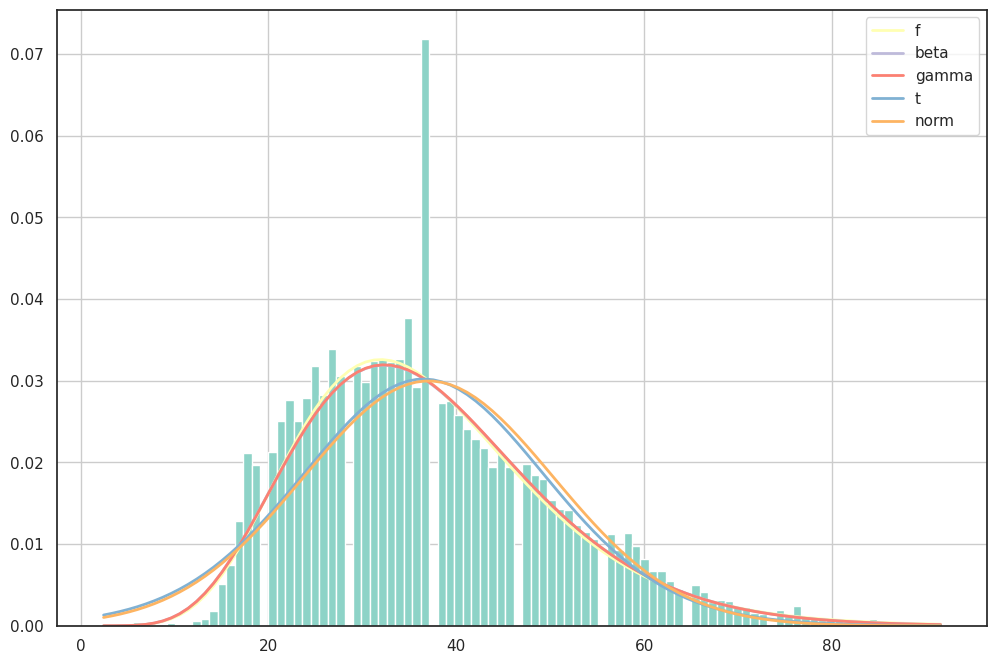

In [ ]:
distribution_M2 = ["gaussian", "norm", "chi2", "cauchy", "expon", "f", "t", "gamma", "beta", "pareto", "uniform", "dweibull"]
f = Fitter(civilian_deaths_df.age, distributions=distribution_M2)
f.fit()

plt.figure(figsize=(12, 8))
plt.title('Fitted Distributions for Number of Deaths per State')
f.summary()

It seems that the Kolmogorov-Smirnov normality test is showing very low $p^*$ at least near to the value of $\alpha$ concerning the adequation test to the Student distribution or to the gaussian distribution. 

Visually our distribution is roughly befitting to those two distributions.

For this time, we'll reject the null hypothesis since $p^{*} <<< \alpha$.

We can conclude that the variable *age* doesn't follow at all a gaussian distribution. 
But that's not enough, we'll secondly perform a stronger and more robust test which is none other than the Shapiro-Wilk test.

Given a small sample, this test is reputed to be the **strongest** in term of normality test.

The statistic test is the following:
$$W = \dfrac{(\sum_{i=1}^{[\frac{n}{2}]}a_{i}X_{i})^2}{\sum_{i=1}^{n}(X_i - \bar{X})^2}$$

where
- $\left[\dfrac{n}{2}\right]$ is the floor function applied on that number.
- $a_i$ is a set of constants defined by $(a_1,..., a_n) = \dfrac{m^TV^{-1}}{(m^TV^{-1}V^{-1}n)^2}$

We reject the normality test if only $W < w_{\alpha,n}$ or by simply comparing $p^*$ with $\alpha$.

In [ ]:
stat, p_value = shapiro(civilian_deaths_df['age'])
results_df = pd.DataFrame({
    'Statistic': ['Shapiro-Wilk', 'p-value'],
    'Value': [stat, p_value]
})
results_df

,Statistic,Value
0,Shapiro-Wilk,0.964723
1,p-value,0.000000


We have $p^*<\alpha$, this just confirm that the variable *age* isn't normally distributed.

No need to perform an ANOVA test then. We'll explore similar non-parametric test such as the Kruskal-Wallis test.

Mainly utilized for small sample or non gaussian sample, the Kruskal-Wallis test determine if there are significant differences between groups based on a single dependent variable. 

This will lead us to calculate ranks $R_{.k}$ for the variable $X_{jk}$ where $R_{.k} = \dfrac{1}{n_k}\sum_{j=1}^{n_k}R_{jk}$

The statistic of the test is given by:
$$KW = \dfrac{12}{n(n+1)}\sum_{k=1}^{K}n_k\left( R_{.k}-\dfrac{n+1}{2}\right)$$

Comparing with one of the quantiles table should be enough to reject or not $H_0$ or just comparing $p^*$ with $\alpha$.

In [ ]:
male_age = civilian_deaths_df[civilian_deaths_df['gender'] == 'Male']['age']
female_age = civilian_deaths_df[civilian_deaths_df['gender'] == 'Female']['age']

race1_age = civilian_deaths_df[civilian_deaths_df['race'] == 'European-American/White']['age']
race2_age = civilian_deaths_df[civilian_deaths_df['race'] == 'African-American/Black']['age']
race3_age = civilian_deaths_df[civilian_deaths_df['race'] == 'Hispanic/Latino']['age']

state1_age = civilian_deaths_df[civilian_deaths_df['state'] == 'CA']['age']
state2_age = civilian_deaths_df[civilian_deaths_df['state'] == 'TX']['age']
state3_age = civilian_deaths_df[civilian_deaths_df['state'] == 'FL']['age']

gender_statistic, gender_p_value = kruskal(male_age, female_age)
race_statistic, race_p_value = kruskal(race1_age, race2_age, race3_age)
state_statistic, state_p_value = kruskal(state1_age, state2_age, state3_age)

results_df = pd.DataFrame({
    'Variable': ['Gender', 'Race', 'State'],
    'Statistic': [gender_statistic, race_statistic, state_statistic],
    'p-value': [gender_p_value, race_p_value, state_p_value]
})

results_df

,Variable,Statistic,p-value
0,Gender,1.895482,1.685849e-01
1,Race,509.195125,2.689574e-111
2,State,23.716026,7.081584e-06


The Kruskal-Wallis test for gender shows a statistic value of 1.895482 with a corresponding p-value of 0.168585. This indicates that there is no significant difference in age across the gender groups. 

For the variable race, the test yields a statistic value of 509.195125 and an extremely small p-value of 2.689574e-111. This indicates strong evidence to reject the null hypothesis of no difference in age among the race groups. 

And finally, the Kruskal-Wallis test for state results in a statistic value of 23.716026 and a very small p-value of 7.081584e-06. This indicates strong evidence against the null hypothesis of no difference in age among the state groups. 


In other words: $p^*_{gender} > \alpha,\; p^*_{state} < \alpha,\; p^*_{race} <<< \alpha.$ We don't reject $H_0$ only for the gender variable.

# Police Deaths

## Parametric Data Descriptive Statistics

In [ ]:
police_deaths_df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/data/data-cleaned/police_deaths.csv', 
                                 sep = ',', encoding = "utf-8")

In [ ]:
police_deaths_df.head(20)

,name,death_cause,date,agency_name,state,state_name
0,Constable Darius Quimby,Gunfire,1791-01-03,Albany County Constable's Office,NY,New York
1,Sheriff Cornelius Hogeboom,Gunfire,1791-10-22,Columbia County Sheriff's Office,NY,New York
2,Deputy Sheriff Isaac Smith,Gunfire,1792-05-17,Westchester County Sheriff's Department,NY,New York
3,Sheriff Robert Maxwell,Gunfire,1797-11-12,Greenville County Sheriff's Office,SC,South Carolina
4,High Sheriff John Caldwell Cook,Gunfire,1804-10-16,Mecklenburg County Sheriff's Office,NC,North Carolina
5,Watchman Christian Luswanger,Other,1806-12-25,New York City Watch,NY,New York
6,Deputy Sheriff John A. Gooch,Gunfire,1807-03-07,Livingston County Sheriff's Department,KY,Kentucky
7,Deputy Sheriff Ebenezer Parker,Assault,1808-01-18,Cumberland County Sheriff's Office,ME,Maine
8,Night Watchman George Workner,Other,1808-03-15,Baltimore City Police Department,MD,Maryland
9,Deputy Sheriff John Tileston Downes,Gunfire,1811-01-28,Hancock County Sheriff's Department,ME,Maine


In [ ]:
police_deaths_df.describe()

,name,death_cause,date,agency_name,state,state_name
count,21321,21321,21321,21321,21321,20988
unique,21305,10,16324,5402,59,56
top,Patrolman James H. Carroll,Gunfire,2001-09-11,New York City Police Department,TX,Texas
freq,2,11372,69,753,1869,1869


The dataset police_deaths_df contains information on 21,321 police deaths.

- The name column has 21,305 unique values, indicating that some names appear multiple times.
- The most common cause of death is "**Gunfire**" which occurred in 11,372 cases.
- The date range of the dataset is not specified.
- The most frequent agency name is "**New York City Police Department**," appearing 753 times.
- The dataset includes data from 59 states, with **Texas (TX)** being the most common state, appearing 1869 times.
- There are 56 unique state names.

## Statistical univariate and multivariate analysis

####**Is there a strong relationship between the cause of death of the policians and the state where they're located in?**

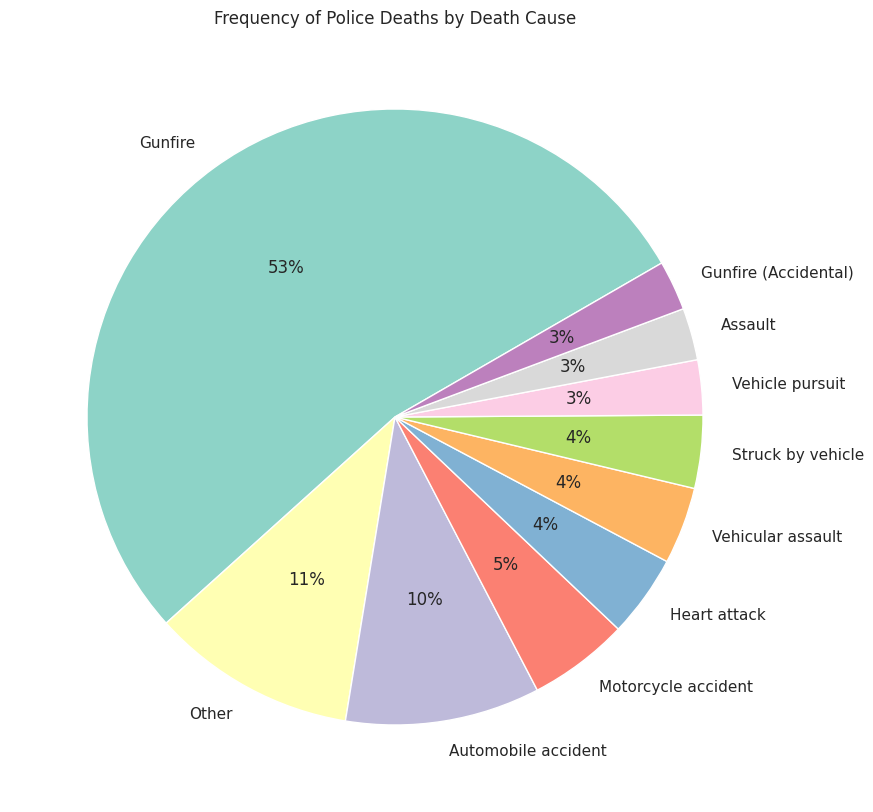

In [ ]:
weapons = police_deaths_df.death_cause.value_counts().to_dict()

plt.pie(police_deaths_df['death_cause'].value_counts(), labels = weapons, autopct='%.0f%%', startangle=30)
plt.title("Frequency of Police Deaths by Death Cause")
plt.show()

In [ ]:
state_counts = police_deaths_df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'Number of Deaths']

fig = px.choropleth(state_counts,
                    locations='state',
                    locationmode='USA-states',
                    color='Number of Deaths',
                    title='Geospatial Distribution of Police Deaths by State',
                    color_continuous_scale='Blues',
                    hover_data={'state': True, 'Number of Deaths': True},
                    scope='usa')

fig.update_traces(marker_line_color='white', marker_line_width=0.5)
fig.update_layout(legend_title_text='States', coloraxis_colorbar=dict(title='Number of Deaths'))
fig.update_geos(subunitcolor='white', subunitwidth=2)
fig.show()

In [ ]:
contingency_table = pd.crosstab(police_deaths_df['death_cause'], police_deaths_df['state'])
contingency_table

state,AK,AL,AR,AS,AZ,CA,CO,CT,CZ,DC,...,TR,TX,UT,VA,VI,VT,WA,WI,WV,WY
death_cause,,,,,,,,,,,,,,,,,,,,,
Assault,1,9,8,1,5,27,10,9,0,1,...,5,58,3,14,0,3,10,5,2,0
Automobile accident,2,76,34,0,24,184,26,10,0,9,...,12,169,12,60,2,2,21,35,17,6
Gunfire,32,302,173,1,139,724,183,47,0,65,...,24,1091,68,276,8,6,146,120,141,33
Gunfire (Accidental),1,10,6,0,3,38,14,3,0,7,...,0,61,9,9,2,1,13,8,8,2
Heart attack,1,26,11,0,7,43,11,10,0,4,...,1,66,1,19,0,3,13,14,4,3
Motorcycle accident,0,32,5,0,9,167,7,13,0,11,...,1,81,2,24,2,1,16,25,7,2
Other,10,27,23,1,25,196,29,17,0,18,...,6,155,19,59,0,5,33,29,20,6
Struck by vehicle,0,16,9,0,9,55,9,20,0,3,...,0,66,1,15,0,2,8,16,3,0
Vehicle pursuit,0,18,6,0,8,70,3,6,0,3,...,0,47,4,12,0,1,9,12,1,1


In [ ]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

summary = pd.DataFrame({
    'Chi-square statistic': [chi2],
    'P-value': [p_value],
    'Degrees of freedom': [dof]
})

summary

,Chi-square statistic,P-value,Degrees of freedom
0,2534.903276,6.780880e-261,522


The $p^*$ is ridiculously small. We reject than $H_0$.

In [ ]:
police_deaths_df['year'] = pd.DatetimeIndex(police_deaths_df['date']).year

We can see that the deadliest period is the end of the 1920s which coincid with the stock market crash of 1929, while lower death rates were observed during World War II, possibly due to military enlistment.

#### **Is there a significant difference between the number of death of civilians and policians based on the death cause across the same states?**

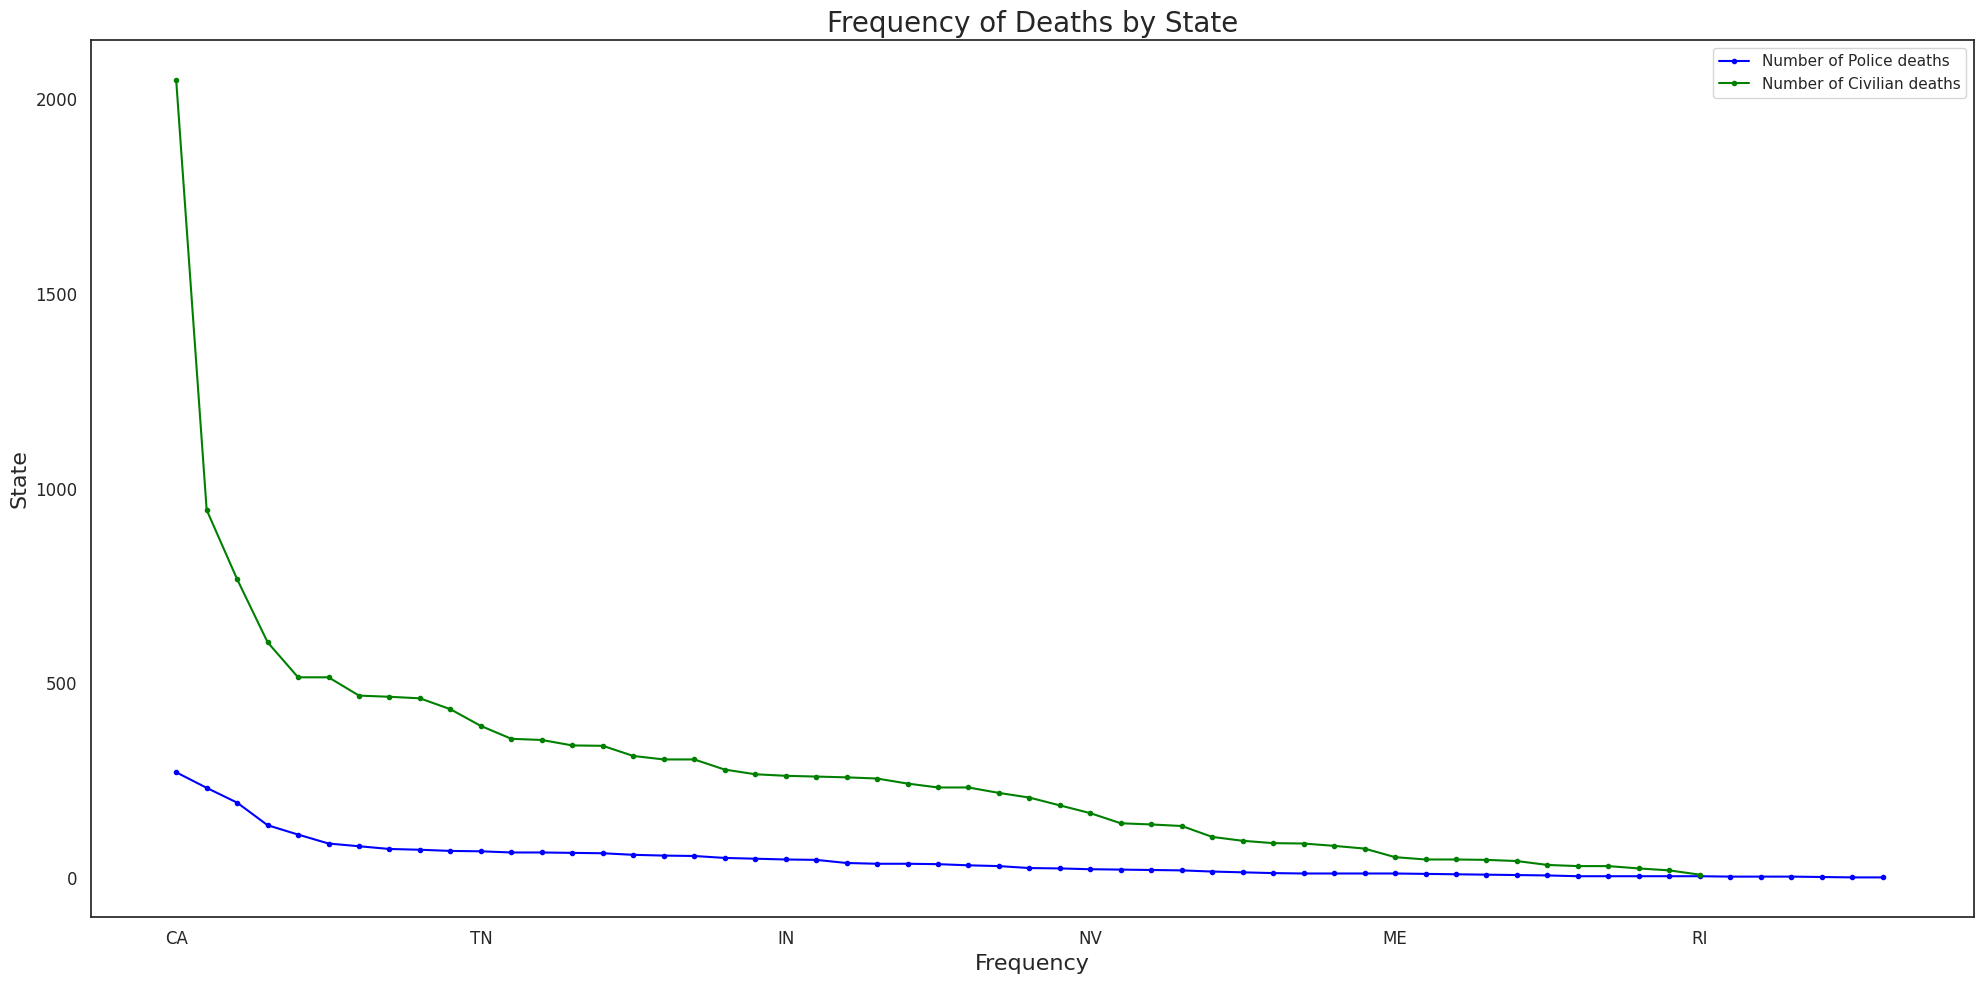

In [ ]:
plt.rcParams["figure.figsize"] = [20.00, 10.00]

min_date = civilian_deaths_df['date'].min()

date_data = police_deaths_df[police_deaths_df['date'] >= min_date]
police_death_counts = date_data['state'].value_counts().reset_index()
police_death_counts.columns = ['state', 'Number of Police deaths']

civilian_deaths_counts = civilian_deaths_df['state'].value_counts().reset_index()
civilian_deaths_counts.columns = ['state', 'Number of Civilian deaths']

ax = police_death_counts.plot(x='state',marker='.', y='Number of Police deaths', color='blue')
civilian_deaths_counts.plot(ax=ax, x='state',marker='.', y='Number of Civilian deaths', color='green')

ax.set_title("Frequency of Deaths by State", fontsize=20)
ax.set_ylabel("State", fontsize=16)
ax.set_xlabel("Frequency", fontsize=16)
ax.set(xticks=(np.arange(0, len(police_deaths_df['state'].value_counts())+1, 1)))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

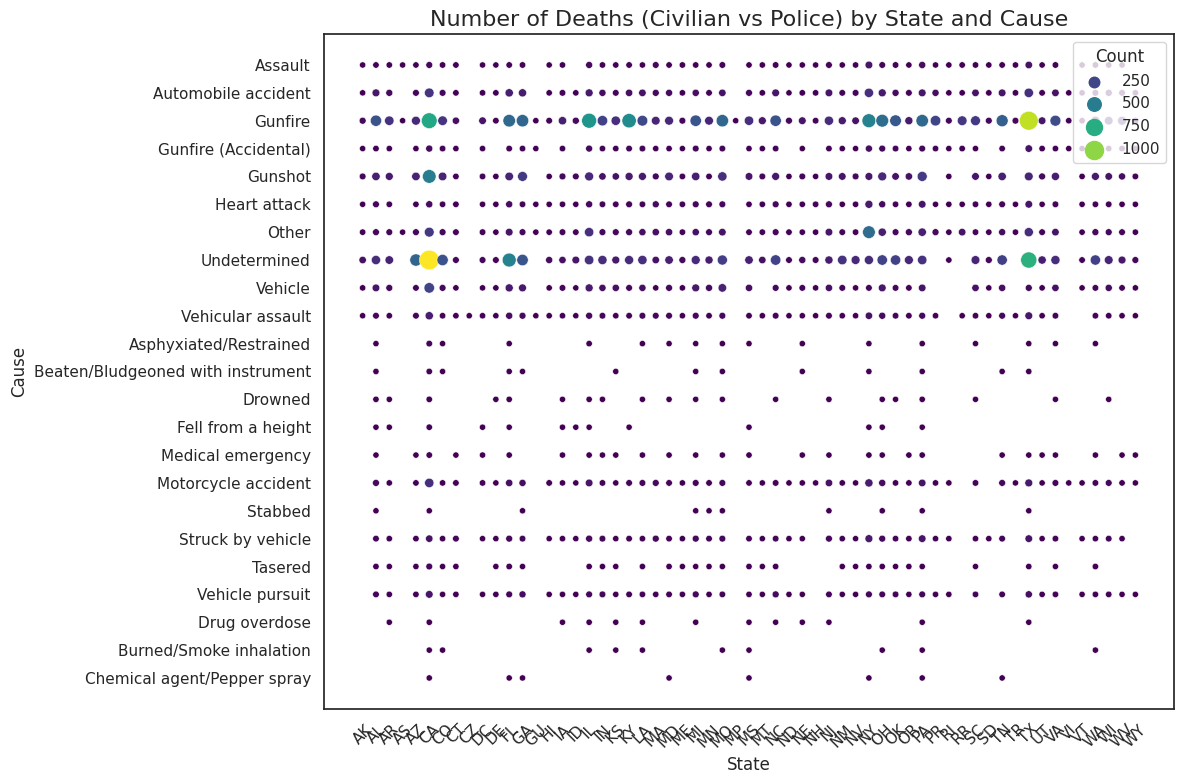

In [ ]:
merged_df = pd.merge(civilian_deaths_df, police_deaths_df, on=['state', 'cause'], how='outer',
                     suffixes=('_civilian', '_police'))

state_cause_counts = merged_df.groupby(['state', 'cause']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.scatterplot(data=state_cause_counts, x='state', y='cause', size='count', hue='count', sizes=(20, 200),
                palette='viridis')
plt.title('Number of Deaths (Civilian vs Police) by State and Cause', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Cause', fontsize=12)
plt.legend(loc='upper right', title='Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Let's perform a Chi test by iterating over our two categorical variables.

In [ ]:
police_deaths_df.rename(columns={"death_cause": "cause"}, inplace=True)

variables = ['state', 'cause']
summary = pd.DataFrame(columns=['Variable', 'Chi-square statistic', 'P-value', 'Degrees of freedom'])

for var in variables:
    civilian_var_counts = civilian_deaths_df[var]
    police_var_counts = police_deaths_df[var]

    contingency_table = pd.crosstab(civilian_var_counts, police_var_counts)

    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    summary = summary.append({
        'Variable': var,
        'Chi-square statistic': chi2,
        'P-value': p_value,
        'Degrees of freedom': dof
    }, ignore_index=True)

summary

,Variable,Chi-square statistic,P-value,Degrees of freedom
0,state,3054.011243,4.737331e-04,2800
1,cause,1652.804892,2.394700e-269,117


Those two $p^*$ are actually smaller than $\alpha$ so there's no significant difference in the number of deaths or based on those the state of belonging and the mutual cause of death.

# Tax Policy

## Parametric Data Descriptive Statistics

In [ ]:
tax_policy_df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/data/data-cleaned/tax_policy.csv', 
                                 sep = ',', encoding = "utf-8")

In [ ]:
tax_policy_df.head(20)

,Region and State,Total,Inter-governmental,Direct: Total,Elementary and Secondary Education,Higher Education,Public Welfare,Health and hospitals,Highways,Police,All Other,Exhibit: Personal Income,year
0,Connecticut,25106.462597,0.000000,25106.462597,6586.940427,1836.176298,4172.489828,1754.316010,1280.984652,805.964479,8669.589272,163013.10,2004
1,Maine,9268.781516,3.311882,9265.469217,2076.259006,656.561276,2307.617004,578.700183,695.155176,207.086975,2744.088346,41664.13,2004
2,Massachusetts,48241.544305,182.951063,48058.598717,10341.013728,2674.599891,10305.484014,1927.087996,3227.687956,1479.743192,18102.979201,273747.70,2004
3,New Hampshire,7433.015442,0.000000,7433.015442,2059.072075,612.636919,1515.397109,177.862045,524.809016,239.018828,2304.217972,49312.43,2004
4,Rhode Island,7650.340659,26.559898,7623.782287,1804.823130,493.836966,1921.452259,321.231196,359.441992,283.999127,2438.996091,38142.14,2004
5,Vermont,4398.146731,0.461030,4397.686746,1154.686194,518.720181,1015.572078,111.244918,333.176081,114.549069,1149.738226,20908.38,2004
6,Delaware,6191.906205,1.018127,6190.890240,1348.726174,694.892068,1020.405144,348.493961,497.737081,201.615970,2079.019224,30880.40,2004
7,District of Columbia,6672.090935,0.000000,6672.090935,1234.763968,101.530894,1685.802137,621.037905,71.271970,421.060966,2536.623095,29345.97,2004
8,Maryland,33981.346987,0.000000,33981.346987,8179.871996,3684.335812,5609.780670,1736.452174,1939.718389,1429.136439,11402.053827,231901.40,2004
9,New Jersey,62991.480800,0.000000,62991.480800,19523.407172,4389.260467,9956.076694,3109.966019,3171.445850,2679.287366,20162.048389,371906.30,2004


In [ ]:
tax_policy_df.describe()

,Total,Inter-governmental,Direct: Total,Elementary and Secondary Education,Higher Education,Public Welfare,Health and hospitals,Highways,Police,All Other,Exhibit: Personal Income,year
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,8.160000e+02,816.000000
mean,51143.102617,79.939913,51063.162773,11370.974505,4857.906411,10018.349066,4662.794258,3131.259991,1900.044219,15121.834210,2.724037e+05,2011.500000
std,65466.784332,437.694952,65153.533488,14059.460297,5908.942251,13941.337161,6715.623800,3351.527578,2703.390637,20182.257699,3.373612e+05,4.612599
min,4158.567190,0.000000,4158.567190,890.816128,101.530894,510.014162,97.653001,71.271970,85.122919,1149.738226,1.815258e+04,2004.000000
25%,13114.248551,0.000000,13114.153007,2759.074267,1254.772970,2559.235035,1068.376476,1099.550222,438.413762,4100.920747,6.540832e+04,2007.750000
50%,32480.473518,0.000000,32480.473518,6968.128842,3401.153558,6057.969780,2746.031538,2156.145996,1090.758285,9063.534111,1.678701e+05,2011.500000
75%,58365.229494,7.656483,58365.229494,13138.326938,5955.122892,11695.549742,5454.540988,3529.718482,2138.167501,17869.378304,3.325549e+05,2015.250000
max,523697.674253,3663.051776,520831.491756,94670.699396,49681.788236,136309.031157,61651.459823,23819.522418,20609.112058,138091.104679,2.544235e+06,2019.000000


This result provides a summary of the basic descriptive statistics for each numeric column in our dataset. Here are some relevant statistics about it:

**Total**: The total funding amount has a wide range, ranging from 4,158.57 to 523,697.67 with a mean of 51,143.10 and a standard deviation of 65,466.78.

**Inter-governmental**: Funding from inter-governmental sources ranges from 0.00 to 3,663.05 with a mean of 79.94 and a standard deviation of 437.69.

**Direct: Total**: The total direct funding amount has a wide range, ranging from 4,158.57 to 520,831.49 with a mean of 51,063.16 and a standard deviation of 65,153.53.

**Elementary and Secondary Education**: Funding for elementary and secondary education ranges from 890.82 to 94,670.70 with a mean of 11,370.97 and a standard deviation of 14,059.46.

**Higher Education**: Funding for higher education ranges from 101.53 to 49,681.79 with a mean of 4,857.91 and a standard deviation of 5,908.94.

**Public Welfare**: Funding for public welfare programs ranges from 510.01 to 136,309.03 with a mean of 10,018.35 and a standard deviation of 13,941.34.

**Health and hospitals**: Funding for health and hospital programs ranges from 97.65 to 61,651.46 with a mean of 4,662.79 and a standard deviation of 6,715.62.

**Highways**: Funding for highways infrastructure ranges from 71.27 to 23,819.52 with a mean of 3,131.26 and a standard deviation of 3,351.53.

**Police**: Funding for police services ranges from 85.12 to 20,609.11 with a mean of 1,900.04 and a standard deviation of 2,703.39.

**All Other**: Funding for other categories not explicitly mentioned ranges from 1,149.74 to 138,091.10 with a mean of 15,121.83 and a standard deviation of 20,182.26.

**Exhibit: Personal Income**: The personal income data has a wide range, ranging from 18,152.58 to 2,544,235 with a mean of 272,403.70 and a standard deviation of 337,361.20.

**Year**: The data spans from the year 2004 to 2019.

In [ ]:
median = tax_policy_df.median()
interquartile_range = tax_policy_df.quantile(0.75) - tax_policy_df.quantile(0.25)
kurtosis = tax_policy_df.kurtosis()
flattening_coefficient = 3 - (6 / (tax_policy_df.std() / tax_policy_df.mean()))
dispersion_mean = tax_policy_df.std() / tax_policy_df.mean() * 100
dispersion_median = interquartile_range / median * 100
quantiles = [0.05, 0.25, 0.50, 0.75, 0.95]
quantiles_values = tax_policy_df.quantile(quantiles)

variables = ['Total', 'Inter-governmental', 'Direct: Total', 'Elementary and Secondary Education',
             'Higher Education', 'Public Welfare', 'Health and hospitals', 'Highways', 'Police', 'All Other',
             'Exhibit: Personal Income', 'year']

statistics_df = pd.DataFrame(
    {
        'Variable': variables,
        'Median': [median[var] for var in variables],
        'Interquartile Range': [interquartile_range[var] for var in variables],
        'Kurtosis': [kurtosis[var] for var in variables],
        'Flattening Coefficient': [flattening_coefficient[var] for var in variables],
        'Dispersion based on Mean': [dispersion_mean[var] for var in variables],
        'Dispersion based on Median': [dispersion_median[var] for var in variables]
    }
)

statistics_df.set_index('Variable', inplace=True)

statistics_df

,Median,Interquartile Range,Kurtosis,Flattening Coefficient,Dispersion based on Mean,Dispersion based on Median
Variable,,,,,,
Total,32480.473518,45250.980943,14.693917,-1.687241,128.007064,139.317492
Inter-governmental,0.000000,7.656483,46.127120,1.904170,547.529936,inf
Direct: Total,32480.473518,45251.076487,14.550272,-1.702415,127.594003,139.317786
Elementary and Secondary Education,6968.128842,10379.252670,8.814752,-1.852665,123.643407,148.953226
Higher Education,3401.153558,4700.349922,16.581192,-1.932768,121.635572,138.198698
Public Welfare,6057.969780,9136.314707,25.557816,-1.311645,139.158030,150.814795
Health and hospitals,2746.031538,4386.164512,21.541701,-1.165922,144.025737,159.727390
Highways,2156.145996,2430.168260,7.650376,-2.605671,107.034471,112.708892
Police,1090.758285,1699.753739,15.190167,-1.217025,142.280406,155.832302


In an even thinner perspective, here's an overview of other statistical metrics that might come handy to interpret the data:

**Higher Education**: The median value for higher education is $3,401.15. The IQR is 4,700.35, representing the range between the 25th and 75th percentiles. The distribution has positive kurtosis (16.58), indicating a relatively peaked distribution. The flattening coefficient is -1.93, suggesting a slight departure from symmetry. The dispersion based on mean is 121.64%, indicating moderate variability around the mean. The dispersion based on the median is 138.20%, indicating relatively high variability around the median.

**Public Welfare**: The median value for public welfare is $6,057.97. The IQR is 9,136.31, representing the range between the 25th and 75th percentiles. The distribution has positive kurtosis (25.56), indicating a highly peaked distribution. The flattening coefficient is -1.31, suggesting a departure from symmetry. The dispersion based on mean is 139.16%, indicating high variability around the mean. The dispersion based on the median is 150.81%, indicating relatively high variability around the median.

**Health and hospitals**: The median value for health and hospitals is $2,746.03. The IQR is 4,386.16, representing the range between the 25th and 75th percentiles. The distribution has positive kurtosis (21.54), indicating a highly peaked distribution. The flattening coefficient is -1.17, suggesting a departure from symmetry. The dispersion based on mean is 144.03%, indicating high variability around the mean. The dispersion based on the median is 159.73%, indicating relatively high variability around the median.

**Highways**: The median value for highways is $2,156.15. The IQR is 2,430.17, representing the range between the 25th and 75th percentiles. The distribution has positive kurtosis (7.65), indicating a slightly peaked distribution. The flattening coefficient is -2.61, suggesting a significant departure from symmetry. The dispersion based on mean is 107.03%, indicating relatively low variability around the mean. The dispersion based on the median is 112.71%, indicating moderate variability around the median.

**Police**: The median value for police is $1,090.76. The IQR is 1,699.75, representing the range between the 25th and 75th percentiles. The distribution has positive kurtosis (15.19), indicating a relatively peaked distribution. The flattening coefficient is -1.22, suggesting a slight departure from symmetry. The dispersion based on mean is 142.28%, indicating high variability around the mean. The dispersion based on the median is 155.83%, indicating relatively high variability around the median.

**All Other**: The median value for all other categories is $9,063.53. The IQR is 13,768.46, representing the range between the 25th and 75th percentiles. The distribution has positive kurtosis (14.20), indicating a relatively peaked distribution. The flattening coefficient is -1.50, suggesting a departure from symmetry. The dispersion based on mean is 133.46%, indicating moderate variability around the mean. The dispersion based on the median is 151.91%, indicating relatively high variability around the median.

**Exhibit**: Personal Income: The median value for personal income is $167,870.15. The IQR is 267,146.59, representing the range between the 25th and 75th percentiles. The distribution has positive kurtosis (12.09), indicating a moderately peaked distribution. The flattening coefficient is -1.84, suggesting a departure from symmetry. The dispersion based on mean is 123.85%, indicating moderate variability around the mean. The dispersion based on the median is 159.14%, indicating relatively high variability around the median.

**Year**: The median value for the year is 2011. The IQR is 7.50, representing the range between the 25th and 75th percentiles. The distribution has negative kurtosis (-1.21), indicating a relatively flat distribution. The flattening coefficient is -2613.53, suggesting a significant departure from symmetry. The dispersion based on mean is 0.23%, indicating relatively low variability around the mean. The dispersion based on the median is 0.37%, indicating low variability around the median.

## Statistical univariate and multivariate analysis

#### **Is all fields budget are contributing to the personal incomes of each state?**

In [ ]:
columns_to_correlate = ['Inter-governmental', 'Direct: Total', 'Elementary and Secondary Education', 'Higher Education',
                       'Public Welfare', 'Health and hospitals', 'Highways', 'Police', 'All Other']

Drawing the boxplot of all explanatory variables.

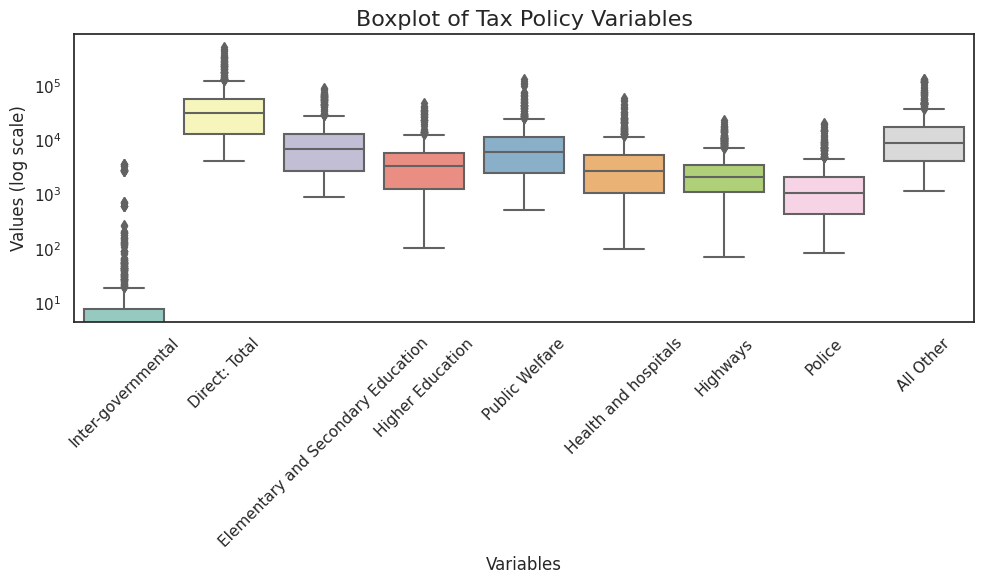

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=tax_policy_df[columns_to_correlate])
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']

for col, color in zip(ax.artists, colors):
    col.set_facecolor(color)

plt.title('Boxplot of Tax Policy Variables', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Values (log scale)', fontsize=12)
plt.xticks(rotation=45)
plt.yscale('log')
plt.tight_layout()
plt.show()

At first glance, there's a lot of outliers that are shaping the boxplot of the Inter-governmental variable. 
The other variables seem to be equally distributed with barely the same IQR.

In [ ]:
df_num = tax_policy_df.select_dtypes(exclude=['object', 'category'])

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

is_outliers = (df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))

outliers = pd.DataFrame({ 'outliers_rate':
                         is_outliers.sum(axis=0) / len(df_num) * 100 })
outliers

,outliers_rate
Total,7.720588
Inter-governmental,17.279412
Direct: Total,7.720588
Elementary and Secondary Education,6.862745
Higher Education,5.269608
Public Welfare,7.352941
Health and hospitals,7.720588
Highways,10.416667
Police,8.455882
All Other,7.720588


As expected, the oultiers are concentrated in the Inter-governmental and the Highways variables.

Plotting an "abline" translating the regression line with the scatter plot of each explanatory variable.

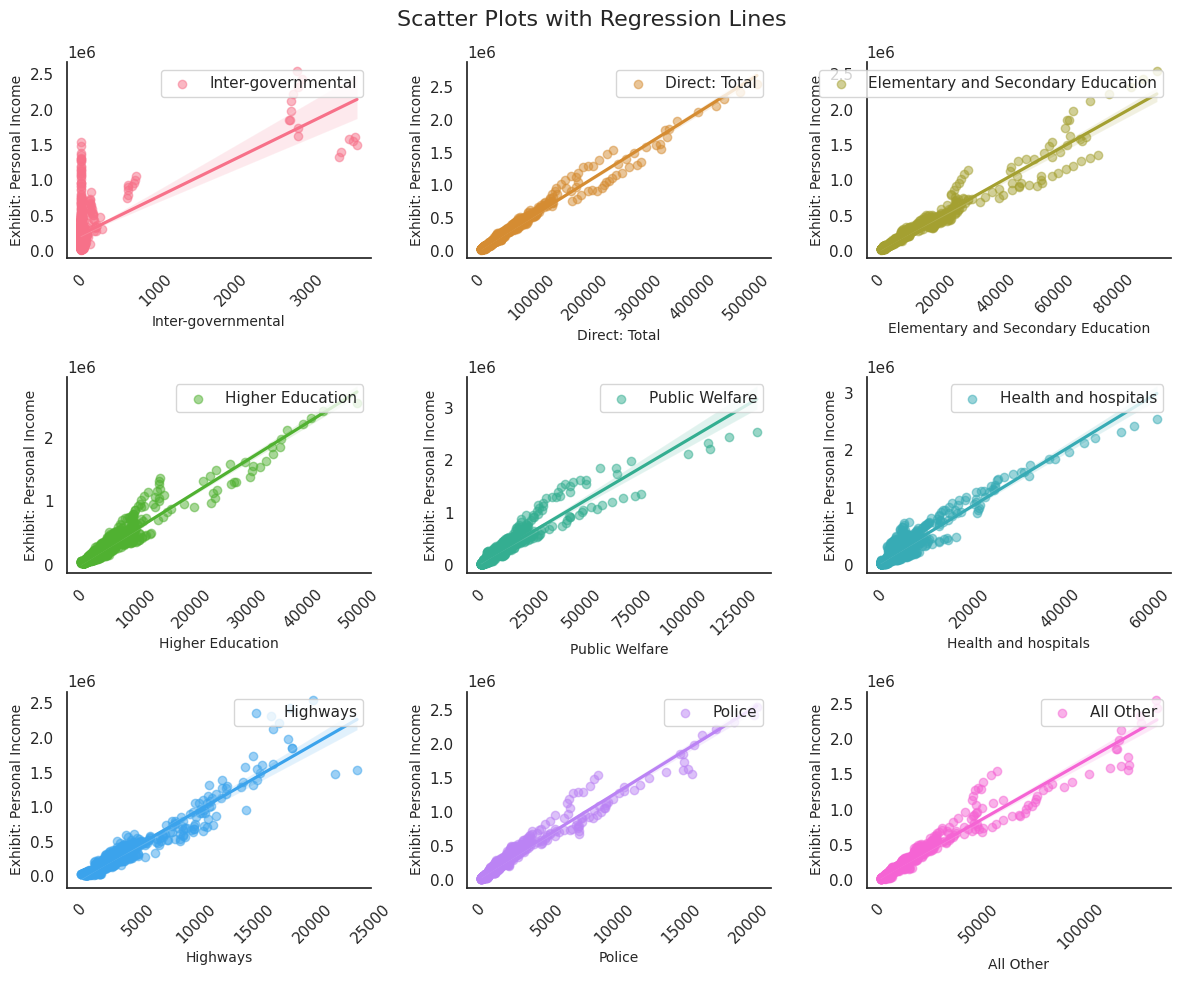

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
fig.suptitle('Scatter Plots with Regression Lines', fontsize=16)

axes = axes.flatten()

for i, variable in enumerate(columns_to_correlate):
    ax = axes[i]
    color = sns.color_palette("husl", len(columns_to_correlate))[i]
    sns.regplot(data=tax_policy_df, x=variable, y='Exhibit: Personal Income', scatter_kws={"alpha": 0.5}, color=color, ax=ax)
    ax.set_xlabel(variable, fontsize=10)
    ax.set_ylabel('Exhibit: Personal Income', fontsize=10)
    ax.legend([variable], loc="upper right")
    sns.despine(ax=ax)
    ax.grid(color='white')
    ax.tick_params(axis='x', rotation=45)

for j in range(len(columns_to_correlate), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The $R^2$ is visibly very near to 90% for almost all the variables except for the Inter-governmental variable.

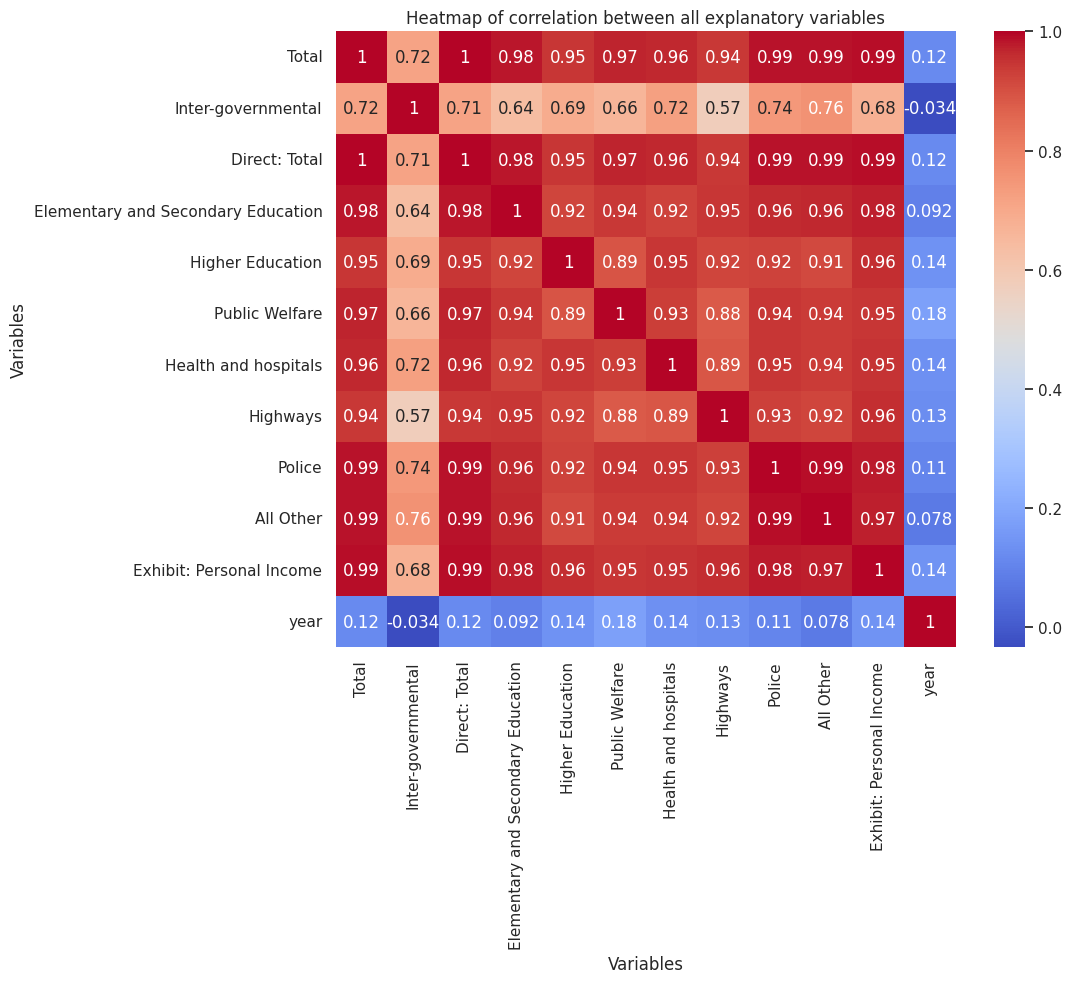

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(tax_policy_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of correlation between all explanatory variables')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

All the variables are strongly correlated between them except the year. That's the less that we can say.

We'll confirm that again by calculating the Pearson's coefficient defined by:
$$\rho_{XY} =\dfrac{Cov(X,Y)}{\sqrt{Var(X)Var(Y)}}$$
where
$$Cov(X,Y) = \sum_{i=1}^{n} (X_i-\bar{X}) (Y_i-\bar{Y})\;;\;Var(X)=\sum_{i=1}^{n} (X_i-\bar{X})\;;\;Var(Y)=\sum_{i=1}^{n} (Y_i-\bar{Y}) $$

In [ ]:
cor_quant_perso_incomes = pd.DataFrame({
    'Feature': columns_to_correlate,
    'Correlation coefficient with the personal incomes': [
        pearsonr(tax_policy_df[column], tax_policy_df['Exhibit: Personal Income'])[0] 
        for column in columns_to_correlate
    ]
})

cor_quant_perso_incomes.sort_values(by='Correlation coefficient with the personal incomes',
                                    ascending=False)

,Feature,Correlation coefficient with the personal incomes
1,Direct: Total,0.988759
7,Police,0.979568
2,Elementary and Secondary Education,0.975156
8,All Other,0.971767
6,Highways,0.959033
3,Higher Education,0.958961
5,Health and hospitals,0.950535
4,Public Welfare,0.945837
0,Inter-governmental,0.677730


No need to try a test about the significancy of the correlation coefficient.

#### **Is there a significant difference in personal incomes among different regions and states?**



We'll perform an ANOVA one factor test according to the presence of the quantitative variable which is represented by the age and the qualitative variable represented by the states.

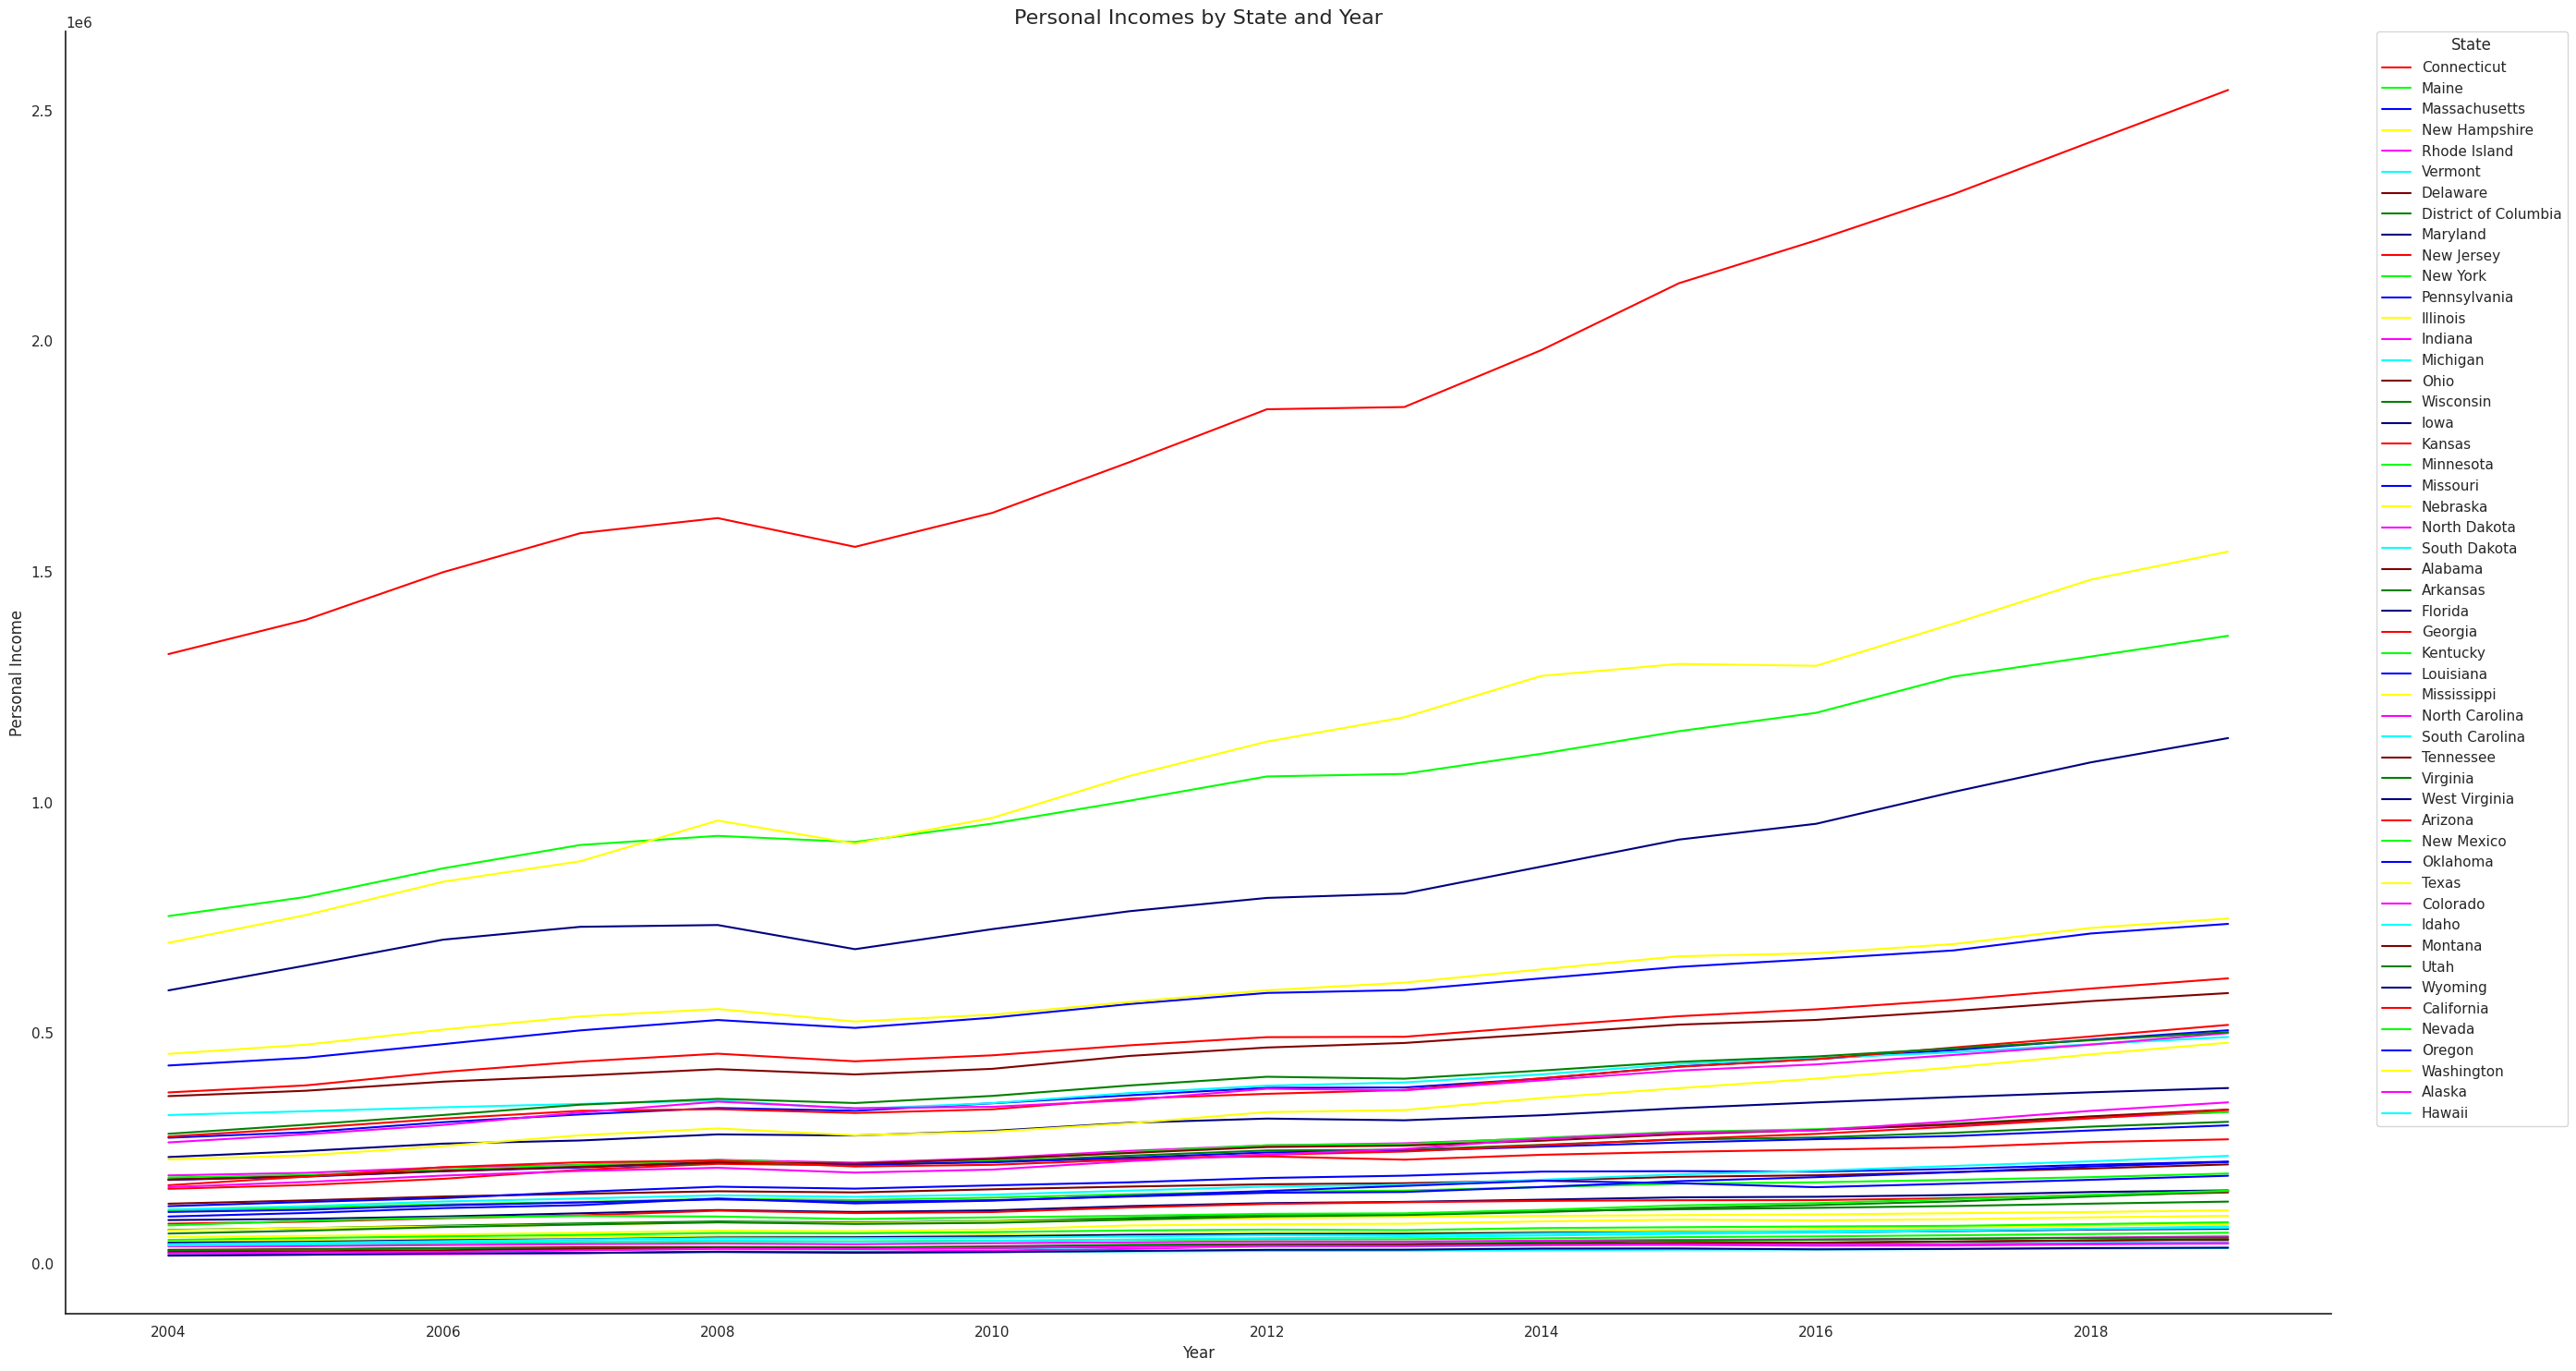

In [ ]:
plt.figure(figsize=(28, 15))
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#800000', '#008000', '#000080']
sns.lineplot(data=tax_policy_df, x="year", y="Exhibit: Personal Income", hue="Region and State", palette=colors)

plt.title('Personal Incomes by State and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Personal Income', fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., title='State')

sns.despine()

plt.tight_layout()
plt.show()

In [ ]:
tax_policy_per_year_df = tax_policy_df.groupby(by=['Region and State','year'],as_index=False).sum()
tax_policy_per_year_df

,Region and State,year,Total,Inter-governmental,Direct: Total,Elementary and Secondary Education,Higher Education,Public Welfare,Health and hospitals,Highways,Police,All Other,Exhibit: Personal Income
0,Alabama,2004,27088.967747,0.000000,27088.967747,5415.705084,3375.292529,4623.716307,4567.669057,1603.822554,770.392709,6732.369507,130774.300
1,Alabama,2005,27558.238151,0.000000,27558.238151,5805.288072,3490.999097,4406.059557,4723.934893,1741.087622,821.770464,6569.097067,137980.500
2,Alabama,2006,29256.548314,33.663795,29222.887446,6552.213819,3742.722643,4499.152595,4698.994242,1920.150554,922.975146,6886.678448,146351.600
3,Alabama,2007,30807.012172,0.000000,30807.012172,7120.704022,4304.785934,4758.077989,4525.302003,1964.910941,982.935000,7150.295934,152246.048
4,Alabama,2008,32498.933615,0.000000,32498.933615,7826.028926,4633.537991,4568.317955,4879.492059,1950.767998,1050.478002,7590.309958,157727.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,Wyoming,2015,8735.846168,19.862999,8715.983088,1923.344012,792.663997,822.784992,1534.416989,812.934008,222.333999,2607.505011,33761.800
812,Wyoming,2016,9099.106993,20.474998,9078.631947,2015.066000,898.175997,853.412999,1627.626994,797.917991,233.497000,2652.935007,31908.500
813,Wyoming,2017,9099.529939,23.018998,9076.511020,1909.154000,910.971986,858.542000,1811.562992,663.501994,223.152000,2699.626006,32918.500
814,Wyoming,2018,8904.227089,33.619999,8870.607097,1725.442004,822.042990,871.322003,1830.340000,665.504016,219.332001,2736.624013,34690.900


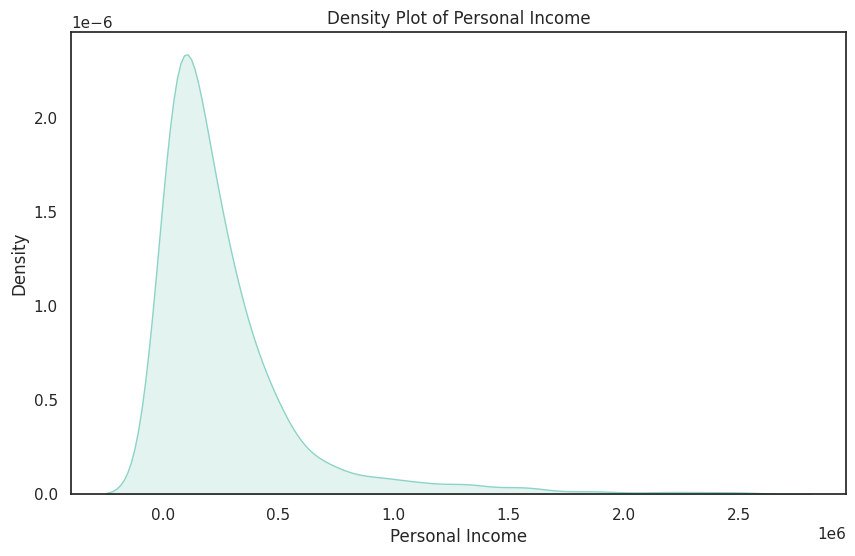

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=tax_policy_per_year_df, x="Exhibit: Personal Income", fill=True)
plt.title('Density Plot of Personal Income')
plt.xlabel('Personal Income')
plt.ylabel('Density')

plt.show()

This density function resemble most likely to the Chi density function than a gaussian density function.

Let's reconfirm this with the Shapiro test.

In [ ]:
stat, p_value = shapiro(tax_policy_per_year_df["Exhibit: Personal Income"])
results_df = pd.DataFrame({
    'Statistic': ['Shapiro-Wilk', 'p-value'],
    'Value': [stat, p_value]
})

results_df

,Statistic,Value
0,Shapiro-Wilk,6.676148e-01
1,p-value,4.232689e-37


We reject the normality test since $p^* < \alpha$. No need to perform the ANOVA test but somehow we'll just try out anyway just to confirm the strong relationship between these two variables.

We print all the metrics that sum up our statistical test such as the result of the $F$ test, the value of the $R^2$ and some other metrics such as model selection thanks to the $AIC$ and $BIC$ criteria.

In [ ]:
tax_policy_per_year_for_anova_df = tax_policy_per_year_df.rename(columns={'Exhibit: Personal Income': 'Exhibit_Personal_Income',
                                                                          'Region and State': 'Region_and_State'})

formula = 'Q("Exhibit_Personal_Income") ~ C(Region_and_State)'
anova_model = ols(formula, data=tax_policy_per_year_for_anova_df).fit()
anova_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Q("Exhibit_Personal_Income")   R-squared:                       0.943
Model:                                      OLS   Adj. R-squared:                  0.939
Method:                           Least Squares   F-statistic:                     253.0
Date:                          Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                                  21:29:54   Log-Likelihood:                -10376.
No. Observations:                           816   AIC:                         2.085e+04
Df Residuals:                               765   BIC:                         2.109e+04
Df Model:                                    50                                         
Covariance Type:                      nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                    1.714e+05   2.08e+04      8.247      0.000    1.31e+05    2.12e+05
C(Region_and_State)[T.Alaska]               -1.353e+05   2.94e+04     -4.601      0.000   -1.93e+05   -7.76e+04
C(Region_and_State)[T.Arizona]               7.268e+04   2.94e+04      2.472      0.014     1.5e+04     1.3e+05
C(Region_and_State)[T.Arkansas]             -6.762e+04   2.94e+04     -2.300      0.022   -1.25e+05   -9907.316
C(Region_and_State)[T.California]            1.683e+06   2.94e+04     57.237      0.000    1.62e+06    1.74e+06
C(Region_and_State)[T.Colorado]              7.212e+04   2.94e+04      2.453      0.014    1.44e+04     1.3e+05
C(Region_and_State)[T.Connecticut]           5.234e+04   2.94e+04      1.780      0.075   -5375.904     1.1e+05
C(Region_and_State)[T.Delaware]             -1.307e+05   2.94e+04     -4.444      0.000   -1.88e+05   -7.29e+04
C(Region_and_State)[T.District of Columbia] -1.285e+05   2.94e+04     -4.370      0.000   -1.86e+05   -7.08e+04
C(Region_and_State)[T.Florida]               6.512e+05   2.94e+04     22.152      0.000    5.94e+05    7.09e+05
C(Region_and_State)[T.Georgia]               2.083e+05   2.94e+04      7.085      0.000    1.51e+05    2.66e+05
C(Region_and_State)[T.Hawaii]               -1.101e+05   2.94e+04     -3.744      0.000   -1.68e+05   -5.24e+04
C(Region_and_State)[T.Idaho]                -1.138e+05   2.94e+04     -3.872      0.000   -1.72e+05   -5.61e+04
C(Region_and_State)[T.Illinois]              4.232e+05   2.94e+04     14.396      0.000    3.66e+05    4.81e+05
C(Region_and_State)[T.Indiana]                8.15e+04   2.94e+04      2.772      0.006    2.38e+04    1.39e+05
C(Region_and_State)[T.Iowa]                 -4.395e+04   2.94e+04     -1.495      0.135   -1.02e+05    1.38e+04
C(Region_and_State)[T.Kansas]               -4.832e+04   2.94e+04     -1.644      0.101   -1.06e+05    9392.924
C(Region_and_State)[T.Kentucky]             -1.647e+04   2.94e+04     -0.560      0.575   -7.42e+04    4.12e+04
C(Region_and_State)[T.Louisiana]             7376.7063   2.94e+04      0.251      0.802   -5.03e+04    6.51e+04
C(Region_and_State)[T.Maine]                 -1.18e+05   2.94e+04     -4.015      0.000   -1.76e+05   -6.03e+04
C(Region_and_State)[T.Maryland]              1.356e+05   2.94e+04      4.612      0.000    7.79e+04    1.93e+05
C(Region_and_State)[T.Massachusetts]          2.08e+05   2.94e+04      7.075      0.000     1.5e+05    2.66e+05
C(Region_and_State)[T.Michigan]              2.191e+05   2.94e+04      7.453      0.000    1.61e+05    2.77e+05
C(Region_and_State)[T.Minnesota]             8.058e+04   2.94

In [ ]:
aov_table = anova_lm(anova_model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Region_and_State),8.746766e+13,50.0,252.997956,0.0
Residual,5.289589e+12,765.0,NaN,NaN


As expected, we obtain so far a null $p^*$ that's certainly inferior to $\alpha$.

Therefore, we cannot conclude that there's a significant difference in personal incomes among different regions and states at some points.

#### **For each pair of states, is there a significant difference in personal incomes among different regions and states?**
In an even smaller granularity, we will broaden the precedent ANOVA test into a more peculiar test that studies the association between each pair of modalities of the qualitative variable with the quantitative variable targetted.

To do so, we'll try out the pairwise comparison test that depicts the tiny relationship that we might filter from our two variables.

In [ ]:
pairwise_test = pingouin.pairwise_ttests(dv='Exhibit: Personal Income', between='Region and State', data=tax_policy_df)
pairwise_test = pairwise_test.rename(columns={'p-unc': 'pvalue'})
pairwise_test['Rejection'] = pairwise_test['pvalue'].apply(lambda p: 'Rejected' if p < 0.05 else 'Not Rejected')
pairwise_test = pairwise_test[['A', 'B', 'pvalue', 'Rejection']][pairwise_test['Rejection'] == 'Not Rejected'] \
                                                            .sort_values(by='pvalue', ascending=False)
                                                            
pairwise_test

,A,B,pvalue,Rejection
465,Georgia,Massachusetts,0.990517,Not Rejected
101,Arizona,Colorado,0.975571,Not Rejected
617,Indiana,Minnesota,0.952952,Not Rejected
89,Alaska,South Dakota,0.936226,Not Rejected
892,Michigan,Virginia,0.926826,Not Rejected
...,...,...,...,...
320,Connecticut,Tennessee,0.070807,Not Rejected
765,Louisiana,Oregon,0.068885,Not Rejected
16,Alabama,Kentucky,0.066893,Not Rejected
55,Alaska,Delaware,0.065143,Not Rejected


We get all the pairs of states that meet the non-rejection of the null hypothesis listed just below:

In [ ]:
list(zip(pairwise_test['A'], pairwise_test['B']))

[('Georgia', 'Massachusetts'),
 ('Arizona', 'Colorado'),
 ('Indiana', 'Minnesota'),
 ('Alaska', 'South Dakota'),
 ('Michigan', 'Virginia'),
 ('Colorado', 'Wisconsin'),
 ('Arkansas', 'Utah'),
 ('Minnesota', 'Tennessee'),
 ('Arizona', 'Wisconsin'),
 ('Alabama', 'South Carolina'),
 ('Indiana', 'Tennessee'),
 ('Massachusetts', 'North Carolina'),
 ('Georgia', 'North Carolina'),
 ('Missouri', 'Wisconsin'),
 ('Hawaii', 'West Virginia'),
 ('Kentucky', 'Oregon'),
 ('Colorado', 'Missouri'),
 ('Colorado', 'Tennessee'),
 ('Arizona', 'Tennessee'),
 ('Vermont', 'Wyoming'),
 ('Arizona', 'Missouri'),
 ('Kentucky', 'Oklahoma'),
 ('Colorado', 'Minnesota'),
 ('Georgia', 'Michigan'),
 ('Arizona', 'Minnesota'),
 ('Massachusetts', 'Michigan'),
 ('Georgia', 'Virginia'),
 ('Colorado', 'Indiana'),
 ('Illinois', 'Pennsylvania'),
 ('Massachusetts', 'Virginia'),
 ('Tennessee', 'Wisconsin'),
 ('Arizona', 'Indiana'),
 ('Delaware', 'Montana'),
 ('Iowa', 'Kansas'),
 ('Oklahoma', 'Oregon'),
 ('Minnesota', 'Wisconsin')